In [ ]:
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="darkgrid") # set the background for the graphs

from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Reading the csv file Car details v3.csv
df = pd.read_csv('/content/incident_report (1).csv')
disaster_data=df.copy()
disaster_data.head(5)

,S.No.,District,VDC/Municipality,Ward No.,Incident Place,Incident Date,Incident,Death Male,Death Female,Death Unknown,...,Private House Fully Damaged,Private House Partially Damaged,Displaced Male(N/A),Displaced Female(N/A),Property Loss,No. of Displaced Family,Cattles Loss,Displaced Shed,Source,Remarks
0,11,Kathmandu,-,NaN,NaN,4/14/2011,Fire,0,0,0,...,0,1,0,0,NaN,0,0,0,Nepal Police,"Gyanendra Raj Sakya,Gopal Bhattarai"
1,12,Sunsari,-,NaN,NaN,4/14/2011,storm,0,0,0,...,0,0,0,0,NaN,0,0,0,Armed Police Force,NaN
2,13,Dhankuta,Leguwa,NaN,NaN,4/14/2011,Thunderbolt,0,0,0,...,0,0,0,0,NaN,0,0,0,"DAO, Dhankuta",NaN
3,14,Nawalparasi,-,NaN,NaN,4/15/2011,Fire,0,0,0,...,1,0,0,0,NaN,0,0,0,Armed Police Force,Mahadev Thakur
4,15,Udayapur,-,NaN,NaN,4/15/2011,Fire,0,0,0,...,2,0,0,0,NaN,0,0,0,Armed Police Force,Dinesh Shrestha


In [ ]:
print(disaster_data.info())
print('**********************************************************\n**********************************************************')
print(disaster_data.describe(include = 'object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36347 entries, 0 to 36346
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   S.No.                            36347 non-null  int64  
 1   District                         36345 non-null  object 
 2   VDC/Municipality                 36347 non-null  object 
 3   Ward No.                         28692 non-null  object 
 4   Incident Place                   17115 non-null  object 
 5   Incident Date                    36347 non-null  object 
 6   Incident                         36347 non-null  object 
 7   Death Male                       36347 non-null  int64  
 8   Death Female                     36347 non-null  int64  
 9   Death Unknown                    36347 non-null  int64  
 10  Total Death                      36347 non-null  int64  
 11  Missing People                   36347 non-null  int64  
 12  Affected Family   

In [ ]:
disaster_data = disaster_data.drop(['S.No.','Ward No.','Death Male','Death Female','Death Unknown', 'VDC/Municipality','Incident Place','Property Loss','Displaced Male(N/A)','Displaced Female(N/A)','Remarks', 'Source'], axis=1)
disaster_data.dropna
# Dropping null values in reference to dataset in 'District' column
disaster_data.dropna(subset = ['Estimated Loss'], inplace=True)
disaster_data.dropna(subset = ['District'], inplace=True)
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21684 entries, 0 to 36346
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   District                         21684 non-null  object 
 1   Incident Date                    21684 non-null  object 
 2   Incident                         21684 non-null  object 
 3   Total Death                      21684 non-null  int64  
 4   Missing People                   21684 non-null  int64  
 5   Affected Family                  21684 non-null  int64  
 6   Estimated Loss                   21684 non-null  float64
 7   Injured                          21684 non-null  int64  
 8   Govt. Houses Fully Damaged       21684 non-null  int64  
 9   Govt. Houses Partially Damaged   21684 non-null  int64  
 10  Private House Fully Damaged      21684 non-null  int64  
 11  Private House Partially Damaged  21684 non-null  int64  
 12  No. of Displaced Family

In [ ]:
disaster_data.isnull().sum().values.sum()

0

In [ ]:
disaster_data.describe()

,Total Death,Missing People,Affected Family,Estimated Loss,Injured,Govt. Houses Fully Damaged,Govt. Houses Partially Damaged,Private House Fully Damaged,Private House Partially Damaged,No. of Displaced Family,Cattles Loss,Displaced Shed
count,21684.000000,21684.000000,21684.000000,2.168400e+04,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000
mean,0.453468,0.018816,3.396606,2.107875e+06,1.118244,0.124239,0.175383,36.951393,15.311382,0.000092,1.075401,0.305202
std,27.938414,1.179431,145.129275,7.468852e+07,62.784072,6.561447,6.404748,1477.724283,530.279116,0.009604,30.321656,2.058927
min,0.000000,0.000000,-2.000000,0.000000e+00,-2.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-2.000000,-2.000000
25%,0.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,6.540000e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3570.000000,139.000000,17376.000000,1.005285e+10,7950.000000,710.000000,684.000000,89884.000000,55131.000000,1.000000,2000.000000,181.000000


In [ ]:
disaster_data['Affected Family'] = disaster_data['Affected Family'].abs()
disaster_data['Injured'] = disaster_data['Injured'].abs()
disaster_data['Govt. Houses Fully Damaged'] = disaster_data['Govt. Houses Fully Damaged'].abs()
disaster_data['Govt. Houses Partially Damaged'] = disaster_data['Govt. Houses Partially Damaged'].abs()
disaster_data['Private House Fully Damaged'] = disaster_data['Private House Fully Damaged'].abs()
disaster_data['Cattles Loss'] = disaster_data['Cattles Loss'].abs()
disaster_data['Displaced Shed'] = disaster_data['Displaced Shed'].abs()
disaster_data.describe()

,Total Death,Missing People,Affected Family,Estimated Loss,Injured,Govt. Houses Fully Damaged,Govt. Houses Partially Damaged,Private House Fully Damaged,Private House Partially Damaged,No. of Displaced Family,Cattles Loss,Displaced Shed
count,21684.000000,21684.000000,21684.000000,2.168400e+04,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000,21684.000000
mean,0.453468,0.018816,3.397344,2.107875e+06,1.118428,0.124331,0.175475,36.951577,15.311382,0.000092,1.075586,0.305571
std,27.938414,1.179431,145.129257,7.468852e+07,62.784068,6.561445,6.404746,1477.724278,530.279116,0.009604,30.321650,2.058873
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,2.500000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,6.540000e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3570.000000,139.000000,17376.000000,1.005285e+10,7950.000000,710.000000,684.000000,89884.000000,55131.000000,1.000000,2000.000000,181.000000


In [ ]:
disaster_data.describe(include = 'object')

,District,Incident Date,Incident
count,21684,21684,21684
unique,79,4097,17
top,Morang,4/25/2015,Fire
freq,1347,75,17787


In [ ]:


disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21684 entries, 0 to 36346
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   District                         21684 non-null  object 
 1   Incident Date                    21684 non-null  object 
 2   Incident                         21684 non-null  object 
 3   Total Death                      21684 non-null  int64  
 4   Missing People                   21684 non-null  int64  
 5   Affected Family                  21684 non-null  int64  
 6   Estimated Loss                   21684 non-null  float64
 7   Injured                          21684 non-null  int64  
 8   Govt. Houses Fully Damaged       21684 non-null  int64  
 9   Govt. Houses Partially Damaged   21684 non-null  int64  
 10  Private House Fully Damaged      21684 non-null  int64  
 11  Private House Partially Damaged  21684 non-null  int64  
 12  No. of Displaced Family

In [ ]:
print(disaster_data.shape,'\n\n')

print(disaster_data.isnull().sum())

(21684, 15) 


District                           0
Incident Date                      0
Incident                           0
Total Death                        0
Missing People                     0
Affected Family                    0
Estimated Loss                     0
Injured                            0
Govt. Houses Fully Damaged         0
Govt. Houses Partially Damaged     0
Private House Fully Damaged        0
Private House Partially Damaged    0
No. of Displaced Family            0
Cattles Loss                       0
Displaced Shed                     0
dtype: int64


In [ ]:
provinces_and_districts = {
    'Koshi': ['Bhojpur', 'Dhankuta', 'Ilam','Jhapa','Khotang','Morang','Okhaldhunga','Panchthar','Shankhuwasabha', 'Solukhumbu','Sunsari','Taplejung', 'Terhathum','Udayapur'],
    'Madhesh': ['Bara', 'Dhanusha', 'Mahottari','Parsa', 'Rautahat','Saptari', 'Sarlahi','Siraha'],
    'Bagmati': ['Bhaktapur', 'Chitawan','Dhading','Dolakha','Kathmandu','Kavrepalanchowk' ,'Lalitpur','Makawanpur','Nuwakot','Ramechhap','Rasuwa','Sindhuli','Sindhupalchowk'],
    'Gandaki': ['Baglung','Gorkha', 'Kaski', 'Lamjung','Manang','Mustang','Myagdi','Nawalparasi','Nawalparasi (Bardghat Susta East)','Parbat','Shyanja', 'Tanahu'],
    'Lumbini': ['Arghakhanchi','Banke','Bardiya','Dang','Gulmi','Kapilbastu', 'Nawalparasi (Bardghat Susta West)','Palpa','Pyuthan','Rolpa','Rukum','Rukum East', 'Rupandehi'],
    'Karnali': ['Dailekh','Dolpa','Humla', 'Jajarkot','Jumla','Kalikot','Mugu','Rukum West','Salyan', 'Surkhet'],
    'Sudurpashchim': ['Achhaam','Baitadi', 'Bajhang', 'Bajura', 'Dadeldhura', 'Darchula','Doti', 'Kailali', 'Kanchanpur']
}

def get_province(district):
  for province, districts in provinces_and_districts.items():
        if district in districts:
            return province
disaster_data['province'] = disaster_data['District'].apply(lambda x:get_province(x))

# 2. Extracting year of incident and typecasting it
disaster_data['incident_year'] = disaster_data['Incident Date'].apply(lambda x: x[-4:])
disaster_data.incident_year = disaster_data['incident_year'].astype("int")

# 3. Transforming the month of occurence data into its corresponding season as per Nepal's climate.
season_name = {
    'Spring': [3, 4, 5],    # March-May
    'Summer': [6, 7, 8],    # June-August
    'Autumn': [9, 10, 11],  # September-November
    'Winter': [12, 1, 2]    # December-February
}

def get_season(month):
  for season, months in season_name.items():
        if month in months:
            return season

disaster_data['incident_month'] = disaster_data['Incident Date'].apply(lambda x: x[0:x.index('/')])
disaster_data.incident_month = disaster_data['incident_month'].astype("int")
disaster_data['season'] = disaster_data['incident_month'].apply(lambda x:get_season(x))


# 4. Creating summed value for Fully damaged houses by merging government and private houses
disaster_data['houses_fully_destroyed'] = disaster_data['Govt. Houses Fully Damaged']+disaster_data['Private House Fully Damaged']

# 5. Creating summed value for Partially damaged houses by merging government and private houses
disaster_data['houses_partially_destroyed'] = disaster_data['Govt. Houses Partially Damaged']+disaster_data['Private House Partially Damaged']

# 6. Reclassifying the disaster names with more focus on Earthquake, Landslide, Flood, Fire and Thunderbolt

disaster_cat = ['Earthquake','Flood','Fire','Landslide','Thunderbolt']

def get_disaster(disaster):
    for disaster_type in disaster_cat:
        if disaster == disaster_type:
          return disaster
        elif disaster == 'Flash Flood':
          return 'Flood'
        elif disaster == 'Forest Fire':
          return 'Fire'
    return 'Other'

disaster_data['Disaster'] = disaster_data['Incident'].apply(lambda x:get_disaster(x))

disaster_data.head(5)

,District,Incident Date,Incident,Total Death,Missing People,Affected Family,Estimated Loss,Injured,Govt. Houses Fully Damaged,Govt. Houses Partially Damaged,...,No. of Displaced Family,Cattles Loss,Displaced Shed,province,incident_year,incident_month,season,houses_fully_destroyed,houses_partially_destroyed,Disaster
0,Kathmandu,4/14/2011,Fire,0,0,2,50000.0,0,0,0,...,0,0,0,Bagmati,2011,4,Spring,0,1,Fire
1,Sunsari,4/14/2011,storm,0,0,0,7000000.0,0,0,0,...,0,0,0,Koshi,2011,4,Spring,0,0,Other
2,Dhankuta,4/14/2011,Thunderbolt,0,0,0,100000.0,0,0,0,...,0,0,0,Koshi,2011,4,Spring,0,0,Thunderbolt
5,Mahottari,4/16/2011,Fire,0,0,1,150000.0,0,0,0,...,0,0,0,Madhesh,2011,4,Spring,1,0,Fire
6,Bardiya,4/17/2011,Fire,0,0,0,150000.0,1,0,0,...,0,0,0,Lumbini,2011,4,Spring,0,0,Fire


In [ ]:
# Dropping unnecessary values and changing type of data set to 'category' to save memory
disaster_data = disaster_data.drop(['Incident','Incident Date','Govt. Houses Fully Damaged','Injured','Private House Partially Damaged','Private House Fully Damaged','Govt. Houses Partially Damaged','incident_month','Missing People', 'No. of Displaced Family','Cattles Loss','Displaced Shed'], axis=1)
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21684 entries, 0 to 36346
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    21684 non-null  object 
 1   Total Death                 21684 non-null  int64  
 2   Affected Family             21684 non-null  int64  
 3   Estimated Loss              21684 non-null  float64
 4   province                    21684 non-null  object 
 5   incident_year               21684 non-null  int64  
 6   season                      21684 non-null  object 
 7   houses_fully_destroyed      21684 non-null  int64  
 8   houses_partially_destroyed  21684 non-null  int64  
 9   Disaster                    21684 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.8+ MB


In [ ]:
new_order = ['Disaster','province','District', 'incident_year','season','Total Death','Estimated Loss','Affected Family','houses_fully_destroyed','houses_partially_destroyed']
disaster_data = disaster_data.reindex(columns=new_order)
print(disaster_data.info(),'\n\n\n')
print(disaster_data.isnull().sum(),'\n\n\n')
print(disaster_data.nunique())

<class 'pandas.core.frame.DataFrame'>
Index: 21684 entries, 0 to 36346
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Disaster                    21684 non-null  object 
 1   province                    21684 non-null  object 
 2   District                    21684 non-null  object 
 3   incident_year               21684 non-null  int64  
 4   season                      21684 non-null  object 
 5   Total Death                 21684 non-null  int64  
 6   Estimated Loss              21684 non-null  float64
 7   Affected Family             21684 non-null  int64  
 8   houses_fully_destroyed      21684 non-null  int64  
 9   houses_partially_destroyed  21684 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.8+ MB
None 



Disaster                      0
province                      0
District                      0
incident_year                 0
season       

In [ ]:
disaster_data.province = disaster_data['province'].astype("category")
disaster_data.Disaster = disaster_data['Disaster'].astype("category")
disaster_data.season = disaster_data['season'].astype("category")
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21684 entries, 0 to 36346
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Disaster                    21684 non-null  category
 1   province                    21684 non-null  category
 2   District                    21684 non-null  object  
 3   incident_year               21684 non-null  int64   
 4   season                      21684 non-null  category
 5   Total Death                 21684 non-null  int64   
 6   Estimated Loss              21684 non-null  float64 
 7   Affected Family             21684 non-null  int64   
 8   houses_fully_destroyed      21684 non-null  int64   
 9   houses_partially_destroyed  21684 non-null  int64   
dtypes: category(3), float64(1), int64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
#get the size of dataframe
print ("Rows     : " , disaster_data.shape[0])
print ("Columns  : " , disaster_data.shape[1])

print ("\nValues : \n", disaster_data.values)
print ("\nFeatures : \n", list(disaster_data.columns))
#print ("\nFeatures : \n", list(disaster_data.columns.to_list()))

Rows     :  21684
Columns  :  10

Values : 
 [['Fire' 'Bagmati' 'Kathmandu' ... 2 0 1]
 ['Other' 'Koshi' 'Sunsari' ... 0 0 0]
 ['Thunderbolt' 'Koshi' 'Dhankuta' ... 0 0 0]
 ...
 ['Fire' 'Bagmati' 'Kathmandu' ... 1 0 0]
 ['Fire' 'Madhesh' 'Saptari' ... 1 0 0]
 ['Fire' 'Koshi' 'Morang' ... 1 0 0]]

Features : 
 ['Disaster', 'province', 'District', 'incident_year', 'season', 'Total Death', 'Estimated Loss', 'Affected Family', 'houses_fully_destroyed', 'houses_partially_destroyed']


In [ ]:
disaster_data.describe()

,incident_year,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed
count,21684.000000,21684.000000,2.168400e+04,21684.000000,21684.000000,21684.000000
mean,2018.369996,0.453468,2.107875e+06,3.397344,37.075909,15.486857
std,3.360262,27.938414,7.468852e+07,145.129257,1482.503752,533.415950
min,2011.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2016.000000,0.000000,1.000000e+05,1.000000,0.000000,0.000000
50%,2019.000000,0.000000,2.500000e+05,1.000000,0.000000,0.000000
75%,2021.000000,0.000000,6.540000e+05,1.000000,1.000000,0.000000
max,2023.000000,3570.000000,1.005285e+10,17376.000000,90594.000000,55427.000000


In [ ]:
disaster_data.describe(include='category')

,Disaster,province,season
count,21684,21684,21684
unique,6,7,4
top,Fire,Koshi,Spring
freq,17809,6568,7941


In [ ]:
list_col=  disaster_data.select_dtypes(['category']).columns
list_col

Index(['Disaster', 'province', 'season'], dtype='object')

In [ ]:
# get counts of unique observations for each category variable
list_col=  disaster_data.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(disaster_data[list_col[i]].value_counts(),'\n\n')

Disaster
Fire           17809
Other           2196
Landslide        711
Thunderbolt      554
Flood            332
Earthquake        82
Name: count, dtype: int64 


province
Koshi            6568
Madhesh          5445
Lumbini          3445
Bagmati          3343
Gandaki          1170
Sudurpashchim    1123
Karnali           590
Name: count, dtype: int64 


season
Spring    7941
Winter    5425
Summer    4586
Autumn    3732
Name: count, dtype: int64 




             count
Disaster          
Fire         17809
Other         2196
Landslide      711
Thunderbolt    554
Flood          332
Earthquake      82
['Fire', 'Other', 'Landslide', 'Thunderbolt', 'Flood', 'Earthquake']
Categories (6, object): ['Earthquake', 'Fire', 'Flood', 'Landslide', 'Other', 'Thunderbolt']


array([<Axes: ylabel='count'>], dtype=object)

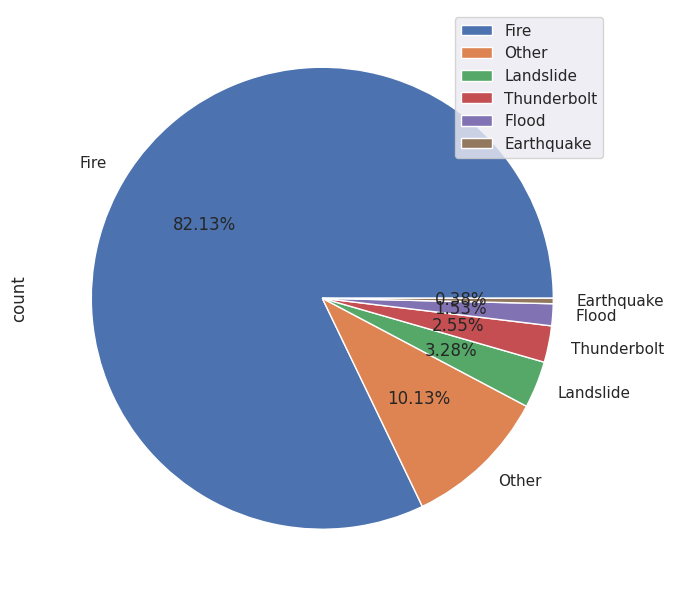

In [ ]:
df_sym = pd.DataFrame(disaster_data['Disaster'].value_counts())
print(df_sym)

print(df_sym.index.values)
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.2f%%', figsize = (15,7.5))

               count
province            
Koshi           6568
Madhesh         5445
Lumbini         3445
Bagmati         3343
Gandaki         1170
Sudurpashchim   1123
Karnali          590
['Koshi', 'Madhesh', 'Lumbini', 'Bagmati', 'Gandaki', 'Sudurpashchim', 'Karnali']
Categories (7, object): ['Bagmati', 'Gandaki', 'Karnali', 'Koshi', 'Lumbini', 'Madhesh',
                         'Sudurpashchim']


array([<Axes: ylabel='count'>], dtype=object)

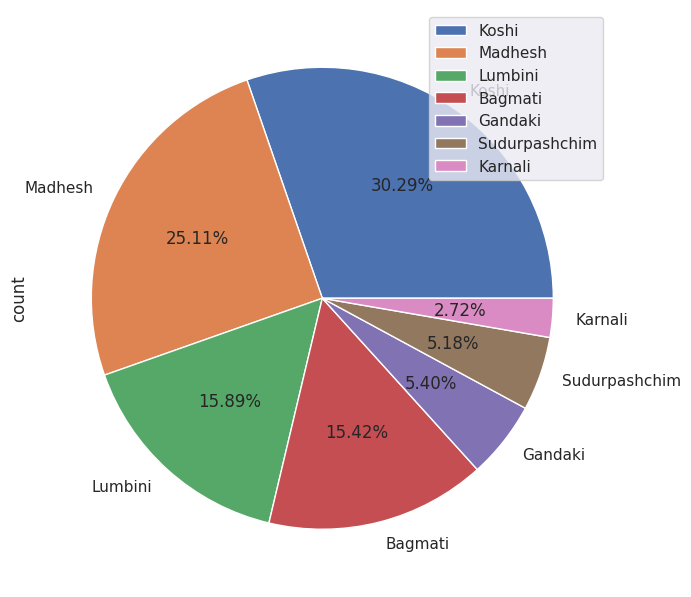

In [ ]:
df_sym = pd.DataFrame(disaster_data['province'].value_counts())
print(df_sym)

print(df_sym.index.values)
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.2f%%', figsize = (15,7.5))

In [ ]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable
 #to check spread, central tendency , dispersion and outliers
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  = plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    print(fig,(ax_box,ax_dis))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]

    fig.suptitle(f"SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)

    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

Figure(800x500) (<Axes: >, <Axes: >)
Figure(800x500) (<Axes: >, <Axes: >)
Figure(800x500) (<Axes: >, <Axes: >)
Figure(800x500) (<Axes: >, <Axes: >)
Figure(800x500) (<Axes: >, <Axes: >)
Figure(800x500) (<Axes: >, <Axes: >)


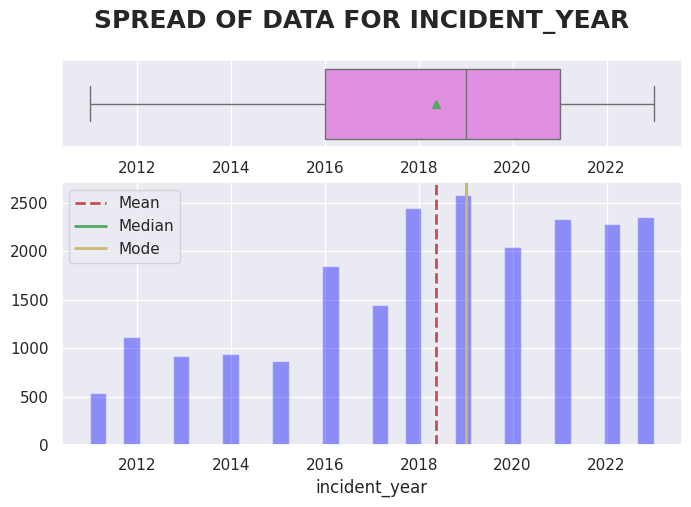

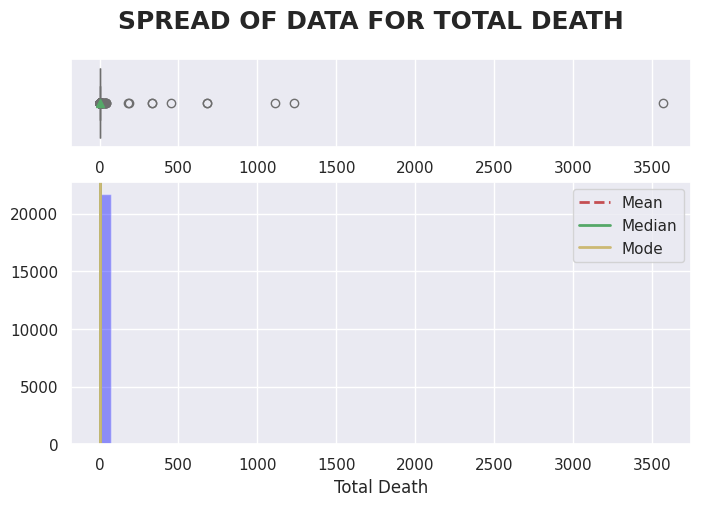

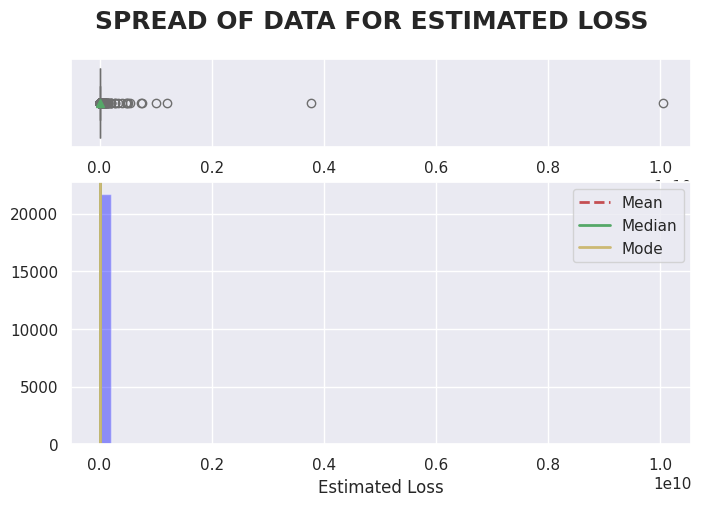

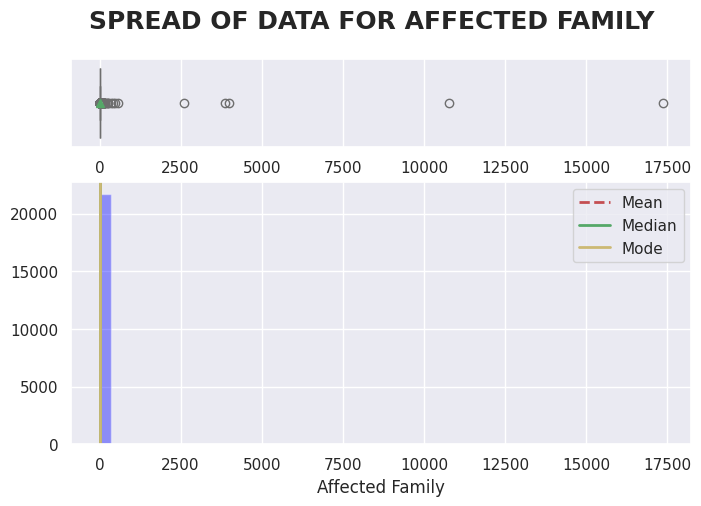

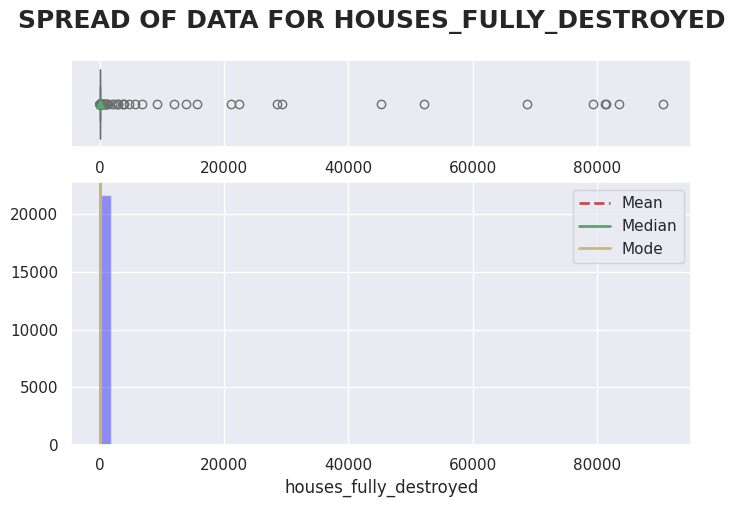

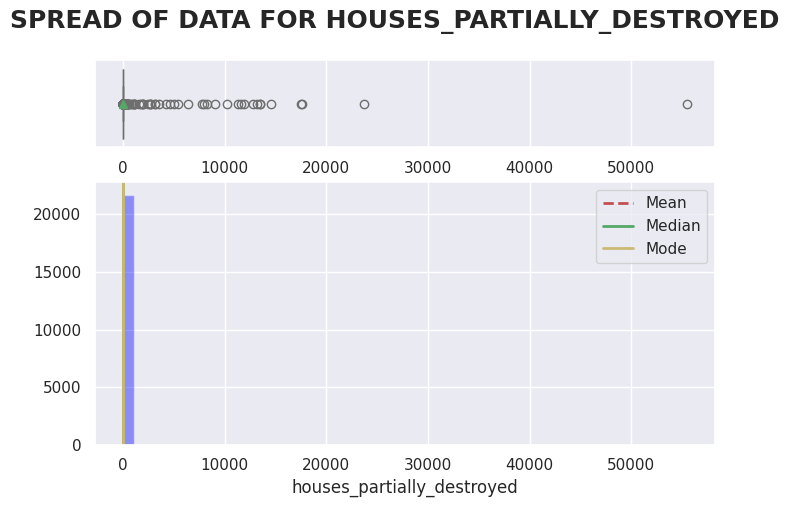

In [ ]:
list_col=  disaster_data.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(disaster_data[list_col[i]])

    # print(disaster_data[list_col[i]],'\n\n')

In [ ]:
sort_column = 'Total Death'  # Replace with the column name for sorting
display_columns = ['Disaster','incident_year', 'Total Death']  # Replace with the column names for display

# Sort the DataFrame by the chosen sort column in ascending order
sorted_data = disaster_data.sort_values(by=sort_column, ascending=False)

# Display the sorted DataFrame with the selected display columns
displayed_data = sorted_data[display_columns]

# Print the displayed data
print(displayed_data)

         Disaster  incident_year  Total Death
6357   Earthquake           2015         3570
6349   Earthquake           2015         1233
6355   Earthquake           2015         1112
6356   Earthquake           2015          681
6354   Earthquake           2015          680
...           ...            ...          ...
11514        Fire           2017            0
11513        Fire           2017            0
11512        Fire           2017            0
11510        Fire           2017            0
36346        Fire           2023            0

[21684 rows x 3 columns]


In [ ]:
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

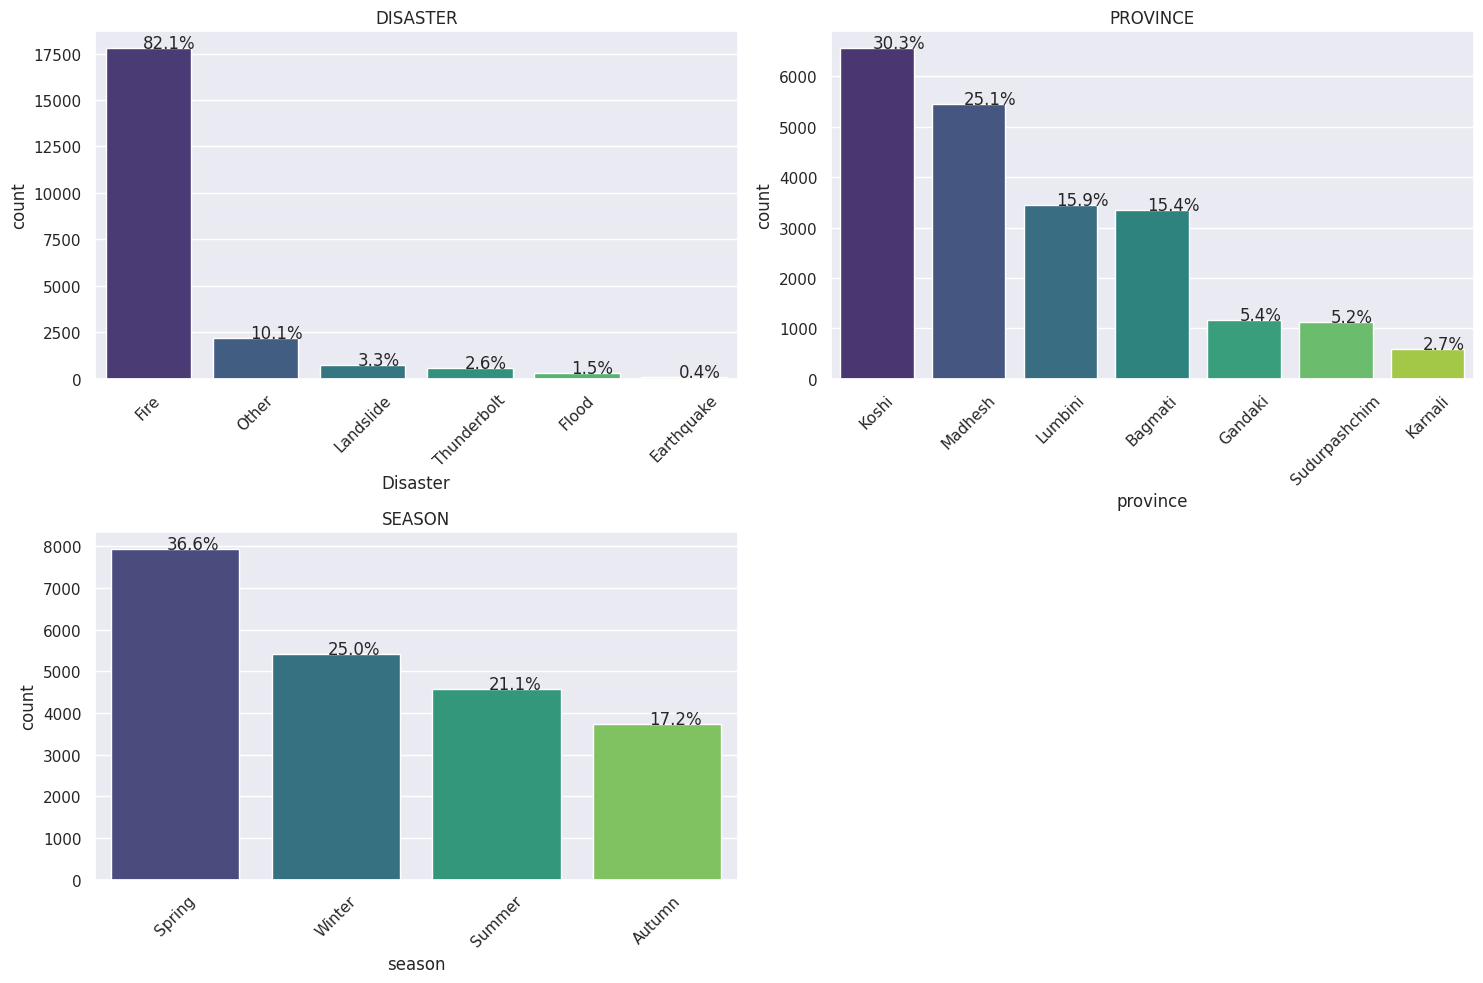

In [ ]:
# Get all category datatype
list_col = disaster_data.select_dtypes(['category']).columns

# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = (len(list_col) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i in range(len(list_col)):
    order = disaster_data[list_col[i]].value_counts(ascending=False).index
    ax = sns.countplot(x=list_col[i], data=disaster_data, order=order, ax=axes[i], palette='viridis')
    ax.set_title(list_col[i].upper())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    bar_perc(ax, disaster_data[list_col[i]])

    # If we have an odd number of categorical columns, remove any unused subplots
    if i == len(list_col) - 1 and len(list_col) % 2 != 0:
        fig.delaxes(axes[i+1])

# Adjust layout
plt.tight_layout()
plt.show()

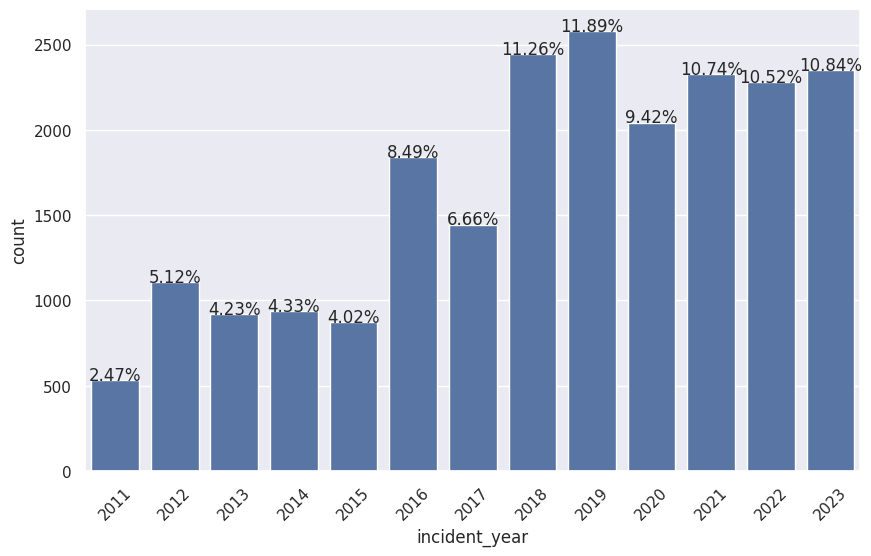

In [ ]:
# Set the size of the figure
plt.figure(figsize=(10, 6))  # Adjust the width and height values as needed

# Create a count plot for the 'incident_year' categories with adjusted bar spacing
ax = sns.countplot(data=disaster_data, x="incident_year", dodge=0.3)  # Adjust the dodge value as needed

# Calculate percentage of each category
total = len(disaster_data)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()


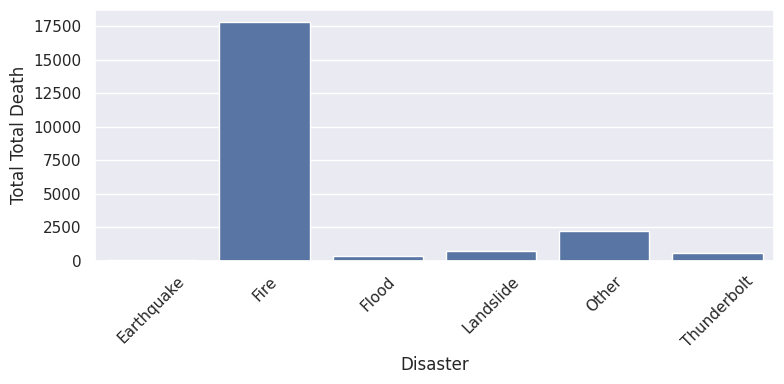

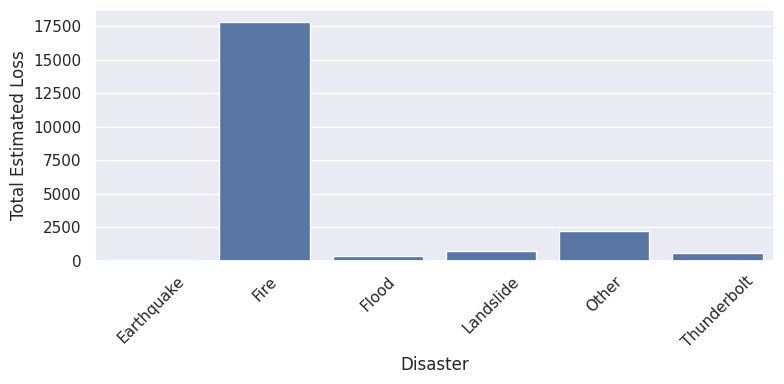

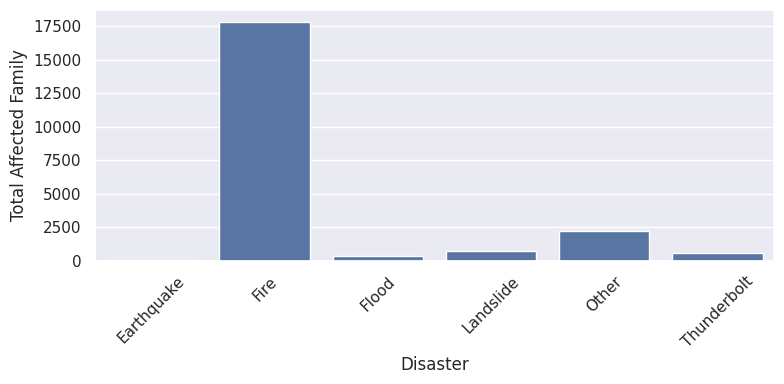

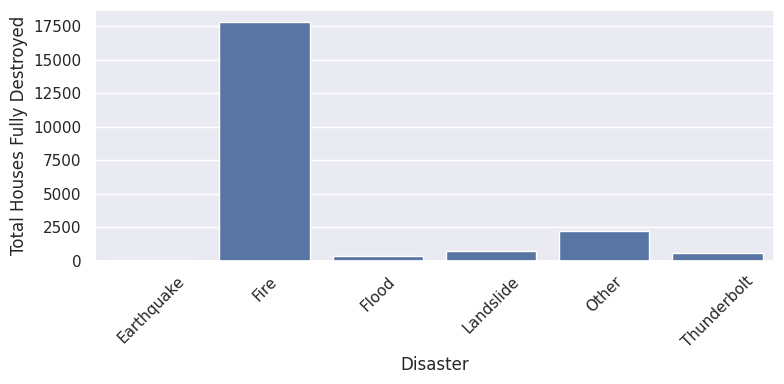

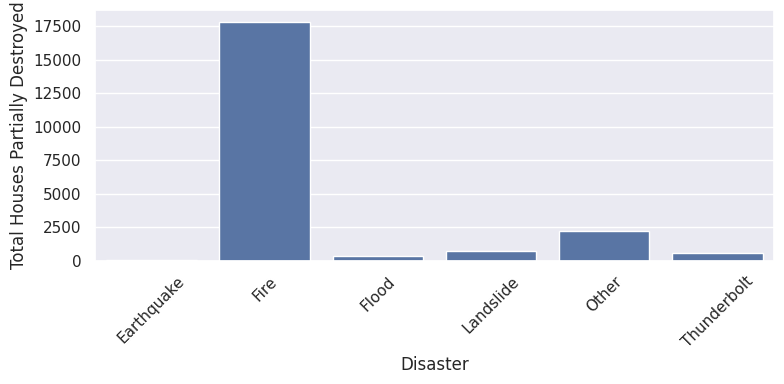

In [ ]:
# Group and sum the data by 'Disaster' for different variables
grouped_data = disaster_data.groupby("Disaster").count()
# List of variables to plot
variables_to_plot = ['Total Death', 'Estimated Loss', 'Affected Family', 'houses_fully_destroyed', 'houses_partially_destroyed' ]

# Loop through each variable and create a bar plot
for variable in variables_to_plot:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=grouped_data.index, y=variable, data=grouped_data)
    plt.xlabel("Disaster")
    plt.ylabel(f"Total {variable.replace('_', ' ').title()}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
data = {}
list_col=  disaster_data.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(disaster_data[list_col[i]].value_counts())
  subcategory = list(disaster_data[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]

data

{'Disaster': [['Fire',
   'Other',
   'Landslide',
   'Thunderbolt',
   'Flood',
   'Earthquake'],
  [17809, 2196, 711, 554, 332, 82]],
 'province': [['Koshi',
   'Madhesh',
   'Lumbini',
   'Bagmati',
   'Gandaki',
   'Sudurpashchim',
   'Karnali'],
  [6568, 5445, 3445, 3343, 1170, 1123, 590]],
 'season': [['Spring', 'Winter', 'Summer', 'Autumn'],
  [7941, 5425, 4586, 3732]]}

In [ ]:
disaster_data

,Disaster,province,District,incident_year,season,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed
0,Fire,Bagmati,Kathmandu,2011,Spring,0,50000.0,2,0,1
1,Other,Koshi,Sunsari,2011,Spring,0,7000000.0,0,0,0
2,Thunderbolt,Koshi,Dhankuta,2011,Spring,0,100000.0,0,0,0
5,Fire,Madhesh,Mahottari,2011,Spring,0,150000.0,1,1,0
6,Fire,Lumbini,Bardiya,2011,Spring,0,150000.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
36339,Fire,Lumbini,Pyuthan,2023,Summer,0,400000.0,1,0,1
36341,Other,Lumbini,Pyuthan,2023,Summer,0,500000.0,2,0,0
36342,Fire,Bagmati,Kathmandu,2023,Summer,0,24080687.0,1,0,0
36345,Fire,Madhesh,Saptari,2023,Summer,0,300000.0,1,0,0


In [ ]:
disaster_data[['incident_year','Total Death','Estimated Loss','Affected Family','houses_fully_destroyed','houses_partially_destroyed']].corr()

,incident_year,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed
incident_year,1.000000,-0.016105,-0.015136,-0.015685,-0.024913,-0.029061
Total Death,-0.016105,1.000000,0.010227,0.010172,0.693448,0.330806
Estimated Loss,-0.015136,0.010227,1.000000,0.477481,0.012181,0.091726
Affected Family,-0.015685,0.010172,0.477481,1.000000,0.022021,0.197270
houses_fully_destroyed,-0.024913,0.693448,0.012181,0.022021,1.000000,0.538862
houses_partially_destroyed,-0.029061,0.330806,0.091726,0.197270,0.538862,1.000000


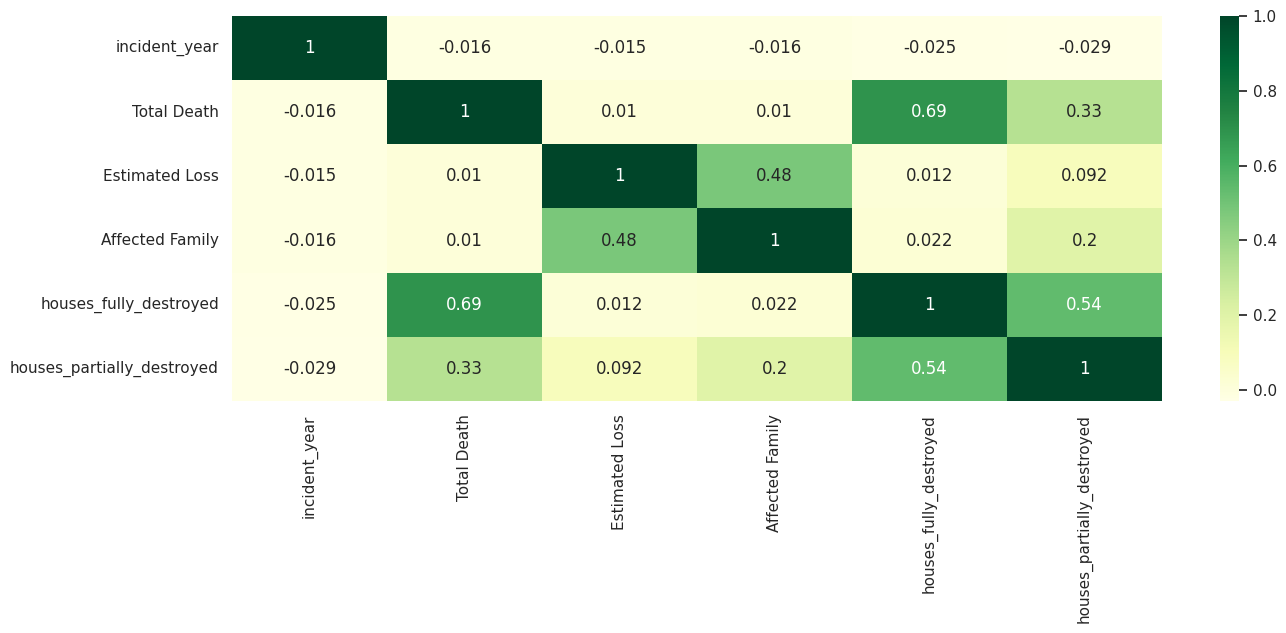

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(disaster_data[['incident_year','Total Death','Estimated Loss','Affected Family','houses_fully_destroyed','houses_partially_destroyed']].corr(),annot=True ,cmap="YlGn" )
plt.show()

In [ ]:
disaster_data.describe()

,incident_year,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed
count,21684.000000,21684.000000,2.168400e+04,21684.000000,21684.000000,21684.000000
mean,2018.369996,0.453468,2.107875e+06,3.397344,37.075909,15.486857
std,3.360262,27.938414,7.468852e+07,145.129257,1482.503752,533.415950
min,2011.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2016.000000,0.000000,1.000000e+05,1.000000,0.000000,0.000000
50%,2019.000000,0.000000,2.500000e+05,1.000000,0.000000,0.000000
75%,2021.000000,0.000000,6.540000e+05,1.000000,1.000000,0.000000
max,2023.000000,3570.000000,1.005285e+10,17376.000000,90594.000000,55427.000000


In [ ]:
quantitative_columns = ['Total Death', 'Estimated Loss', 'Affected Family', 'houses_fully_destroyed','houses_partially_destroyed']

# Create new columns with the log-transformed values
for col in quantitative_columns:
    new_col_name = f'Log_{col}'
    disaster_data[new_col_name] = np.log1p(disaster_data[col])

disaster_data

,Disaster,province,District,incident_year,season,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed,Log_Total Death,Log_Estimated Loss,Log_Affected Family,Log_houses_fully_destroyed,Log_houses_partially_destroyed
0,Fire,Bagmati,Kathmandu,2011,Spring,0,50000.0,2,0,1,0.0,10.819798,1.098612,0.000000,0.693147
1,Other,Koshi,Sunsari,2011,Spring,0,7000000.0,0,0,0,0.0,15.761421,0.000000,0.000000,0.000000
2,Thunderbolt,Koshi,Dhankuta,2011,Spring,0,100000.0,0,0,0,0.0,11.512935,0.000000,0.000000,0.000000
5,Fire,Madhesh,Mahottari,2011,Spring,0,150000.0,1,1,0,0.0,11.918397,0.693147,0.693147,0.000000
6,Fire,Lumbini,Bardiya,2011,Spring,0,150000.0,0,0,0,0.0,11.918397,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36339,Fire,Lumbini,Pyuthan,2023,Summer,0,400000.0,1,0,1,0.0,12.899222,0.693147,0.000000,0.693147
36341,Other,Lumbini,Pyuthan,2023,Summer,0,500000.0,2,0,0,0.0,13.122365,1.098612,0.000000,0.000000
36342,Fire,Bagmati,Kathmandu,2023,Summer,0,24080687.0,1,0,0,0.0,16.996921,0.693147,0.000000,0.000000
36345,Fire,Madhesh,Saptari,2023,Summer,0,300000.0,1,0,0,0.0,12.611541,0.693147,0.000000,0.000000


<Figure size 500x500 with 0 Axes>

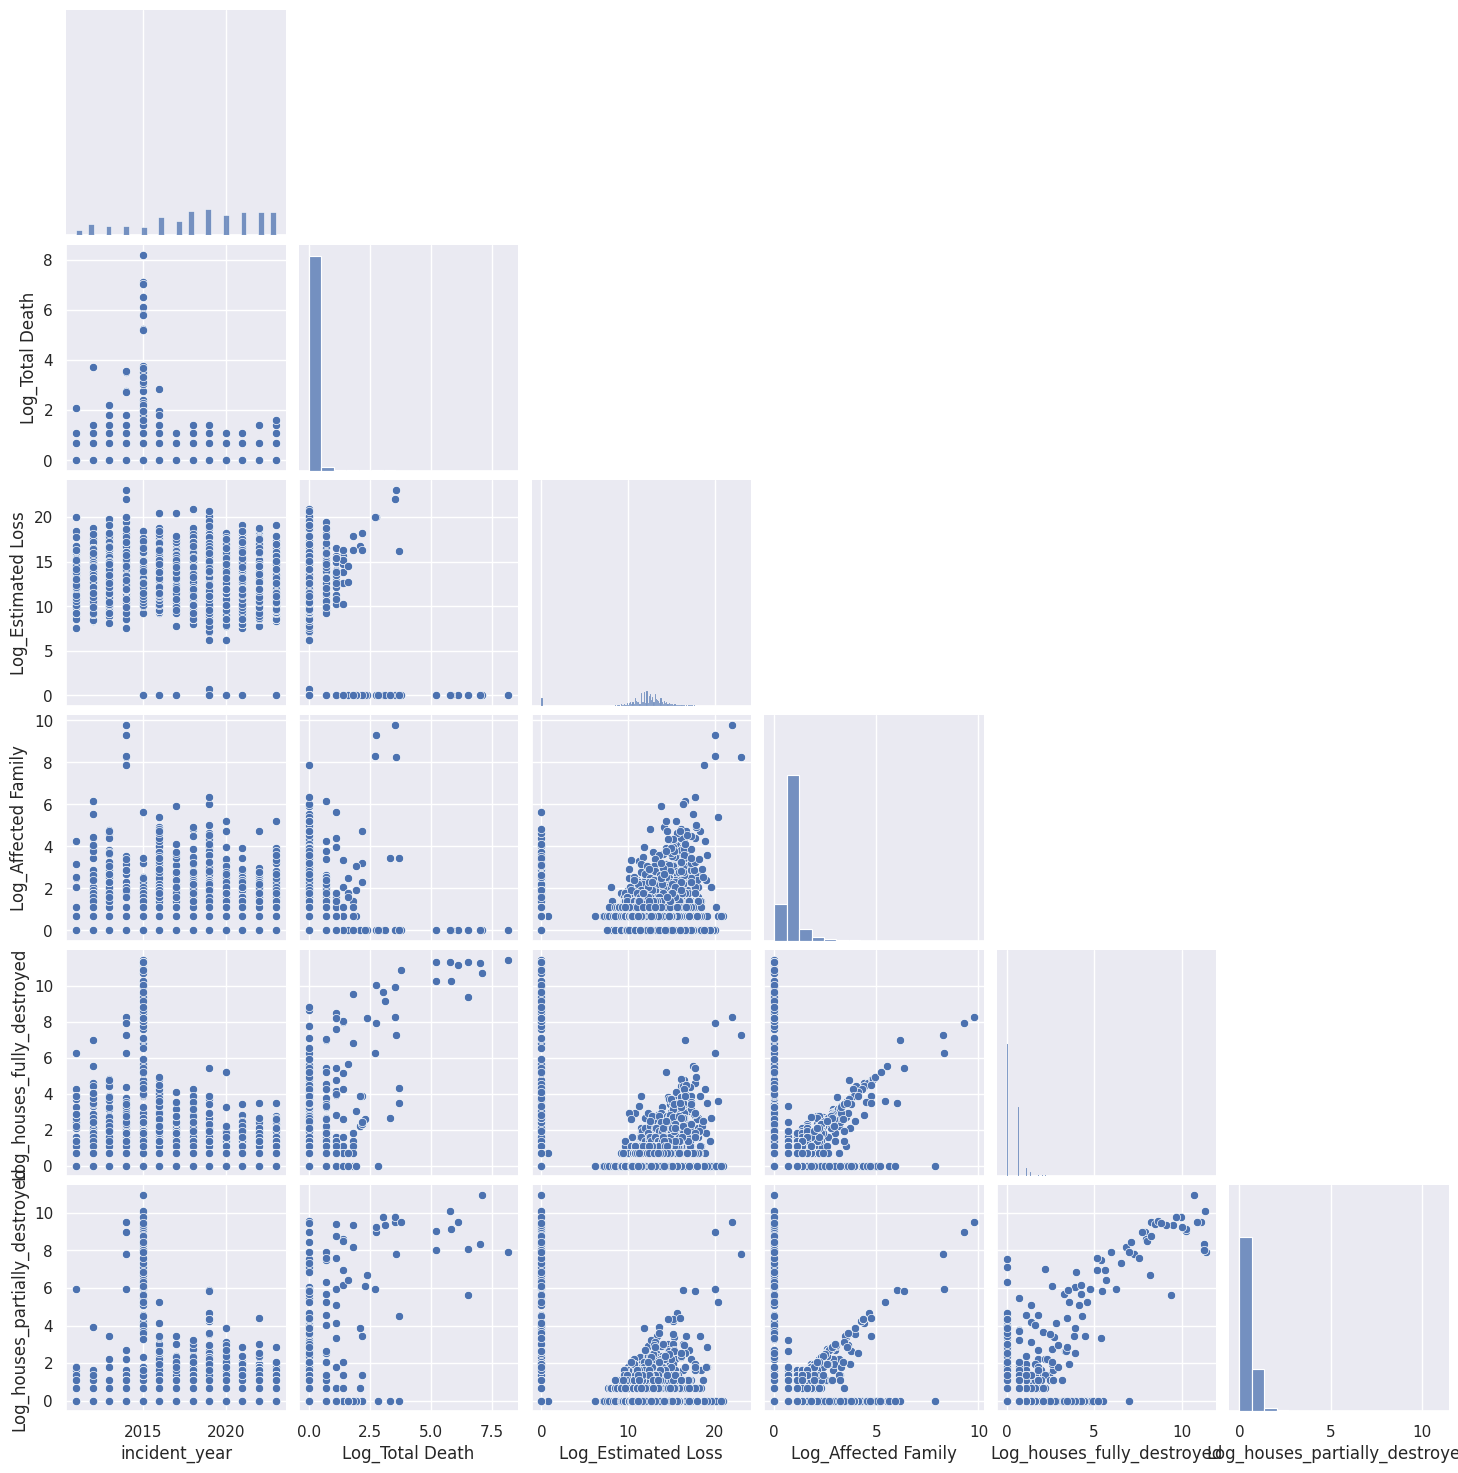

In [ ]:
plt.figure(figsize=(5,5))
columns = ['incident_year','Log_Total Death', 'Log_Estimated Loss', 'Log_Affected Family', 'Log_houses_fully_destroyed','Log_houses_partially_destroyed']
sns.pairplot(data=disaster_data[columns] , corner=True)
plt.show()

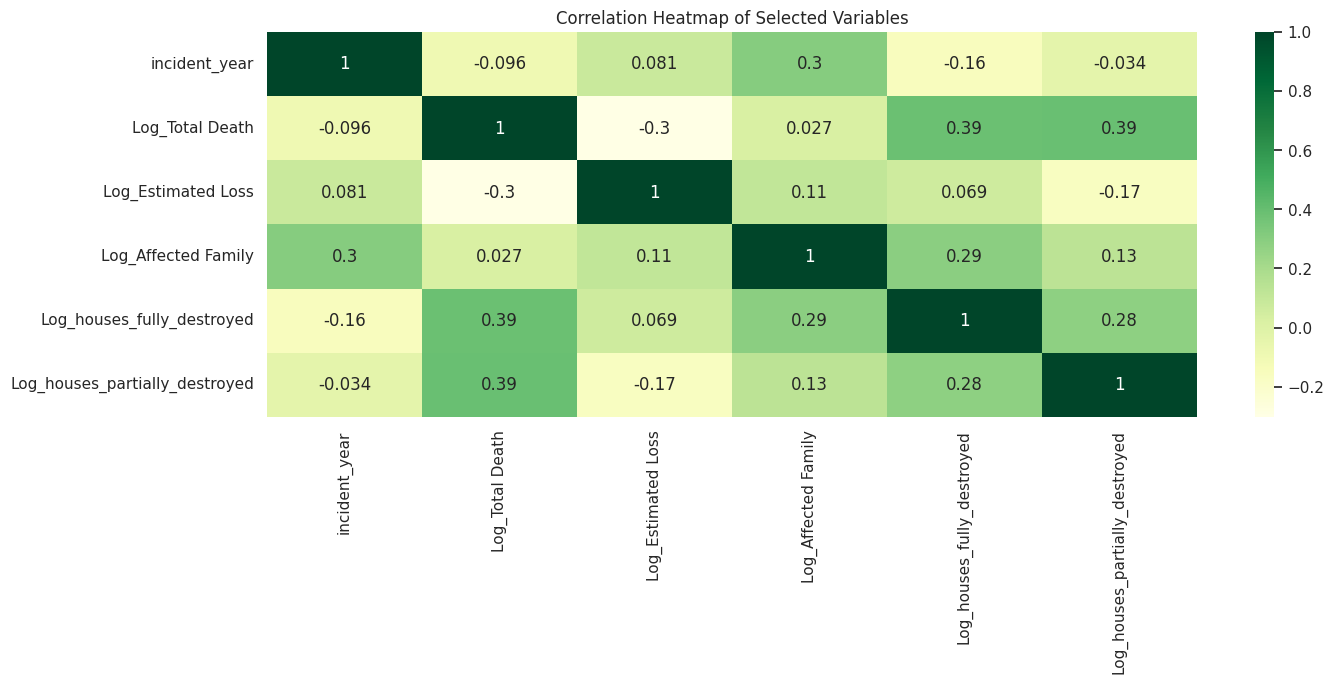

In [ ]:
selected_columns = ['incident_year','Log_Total Death', 'Log_Estimated Loss', 'Log_Affected Family', 'Log_houses_fully_destroyed','Log_houses_partially_destroyed']

# Create a DataFrame containing only the selected columns
selected_data = disaster_data[selected_columns]

# Generate the heatmap of the correlation matrix
plt.figure(figsize=(15, 5))
sns.heatmap(selected_data.corr(), annot=True, cmap="YlGn")
plt.title("Correlation Heatmap of Selected Variables")
plt.show()

In [ ]:
disaster_data = disaster_data.drop(['Log_Total Death', 'Log_Estimated Loss', 'Log_Affected Family', 'Log_houses_fully_destroyed','Log_houses_partially_destroyed'], axis=1)
disaster_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21684 entries, 0 to 36346
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Disaster                    21684 non-null  category
 1   province                    21684 non-null  category
 2   District                    21684 non-null  object  
 3   incident_year               21684 non-null  int64   
 4   season                      21684 non-null  category
 5   Total Death                 21684 non-null  int64   
 6   Estimated Loss              21684 non-null  float64 
 7   Affected Family             21684 non-null  int64   
 8   houses_fully_destroyed      21684 non-null  int64   
 9   houses_partially_destroyed  21684 non-null  int64   
dtypes: category(3), float64(1), int64(5), object(1)
memory usage: 1.4+ MB


In [ ]:
disaster_data.describe(include = "category")

,Disaster,province,season
count,21684,21684,21684
unique,6,7,4
top,Fire,Koshi,Spring
freq,17809,6568,7941


[Text(0.5, 1.0, 'Province vs Season')]

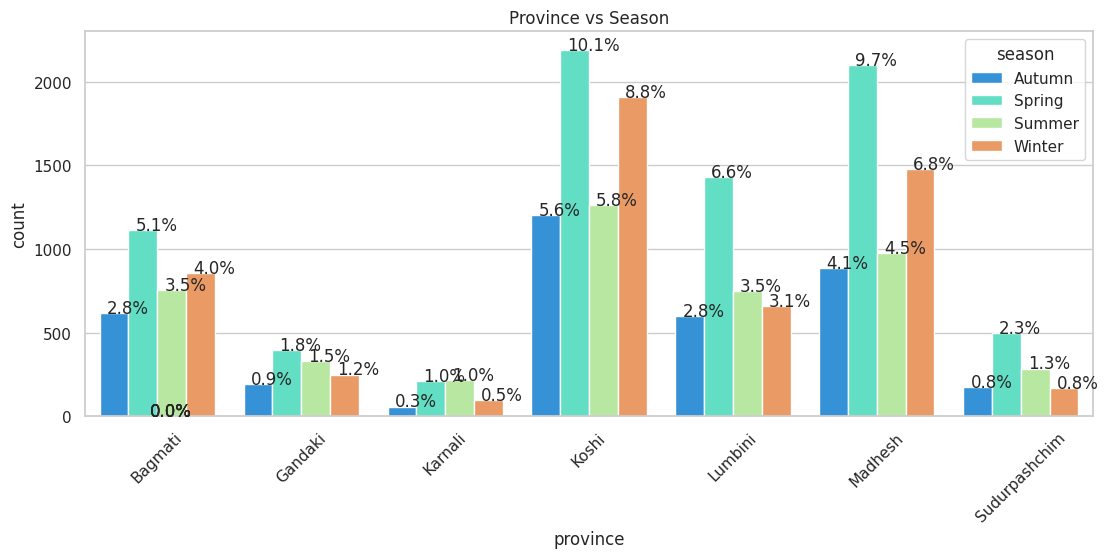

In [ ]:
plt.figure(figsize=(13,5))
sns.set(style="whitegrid")
ax=sns.countplot(x='province',hue='season',data=disaster_data,palette='rainbow')
bar_perc(ax,disaster_data['province'])
plt.xticks(rotation=45)
ax.set(title="Province vs Season")

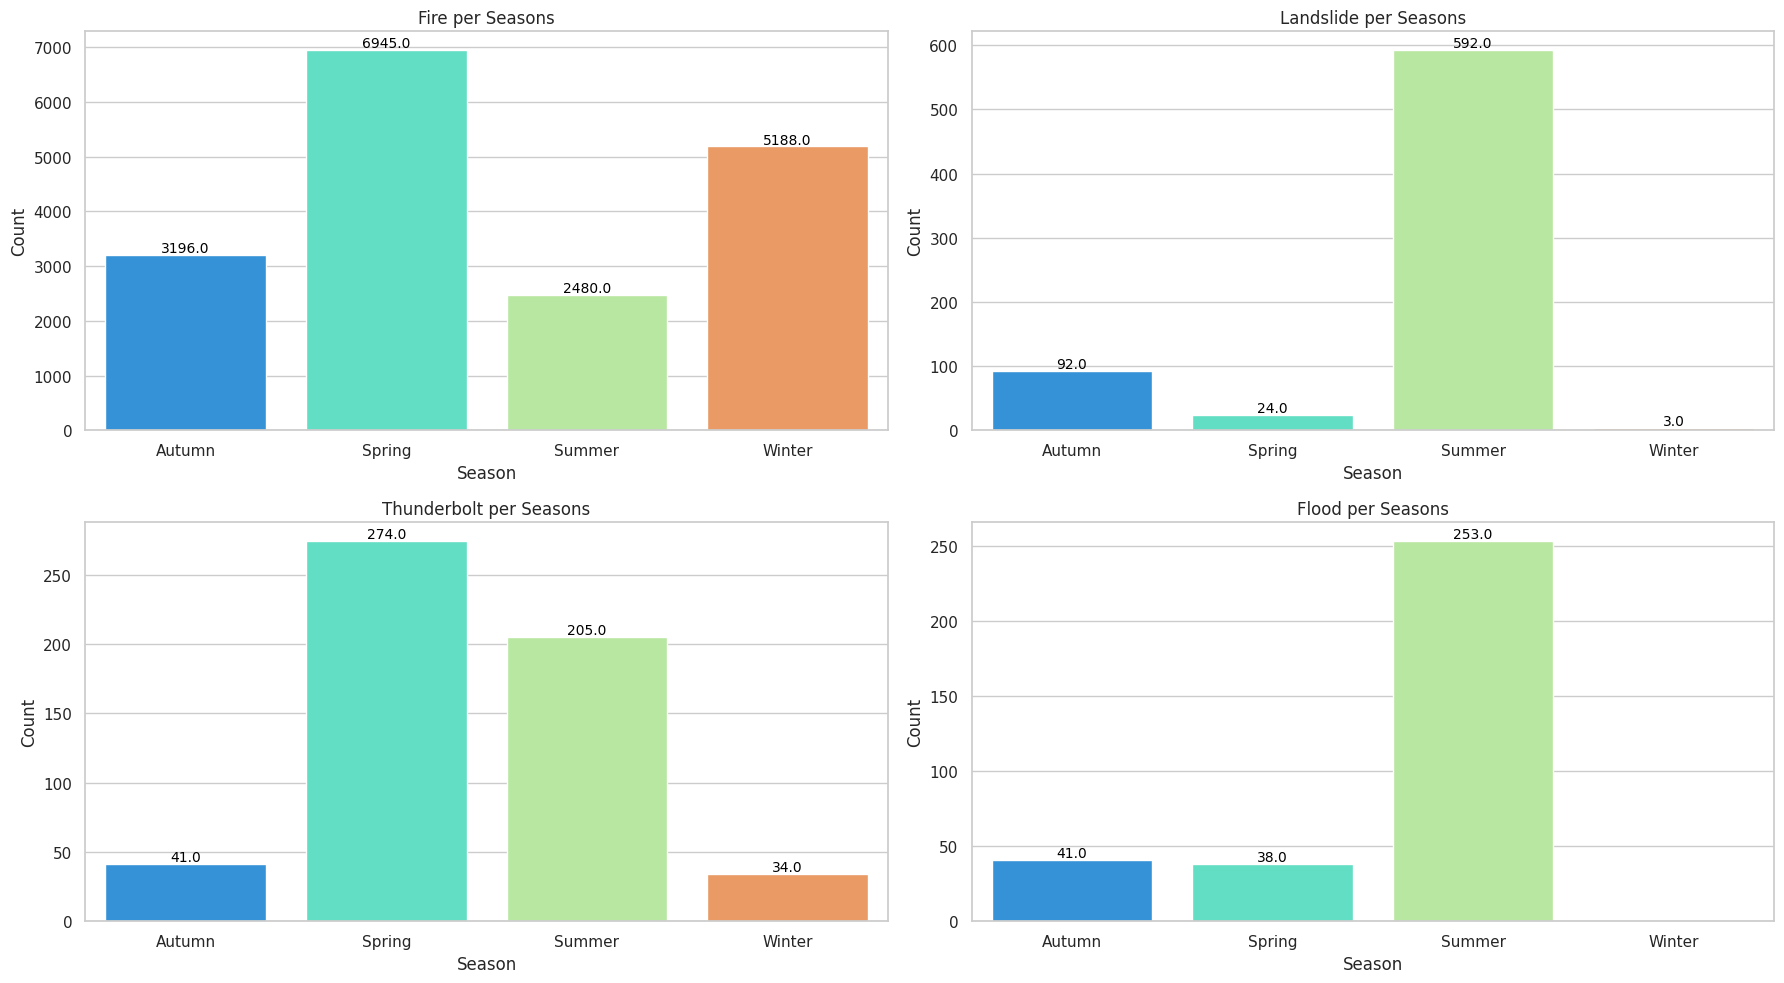

In [ ]:
selected_disasters = ['Fire', 'Landslide', 'Thunderbolt', 'Flood']
filtered_data = disaster_data[disaster_data['Disaster'].isin(selected_disasters)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

for i, disaster in enumerate(selected_disasters):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    current_disaster_data = filtered_data[filtered_data['Disaster'] == disaster]
    sns.countplot(data=current_disaster_data, x='season', ax=ax, palette='rainbow')

    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

        ax.set_title(f"{disaster} per Seasons")
    ax.set_xlabel("Season")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

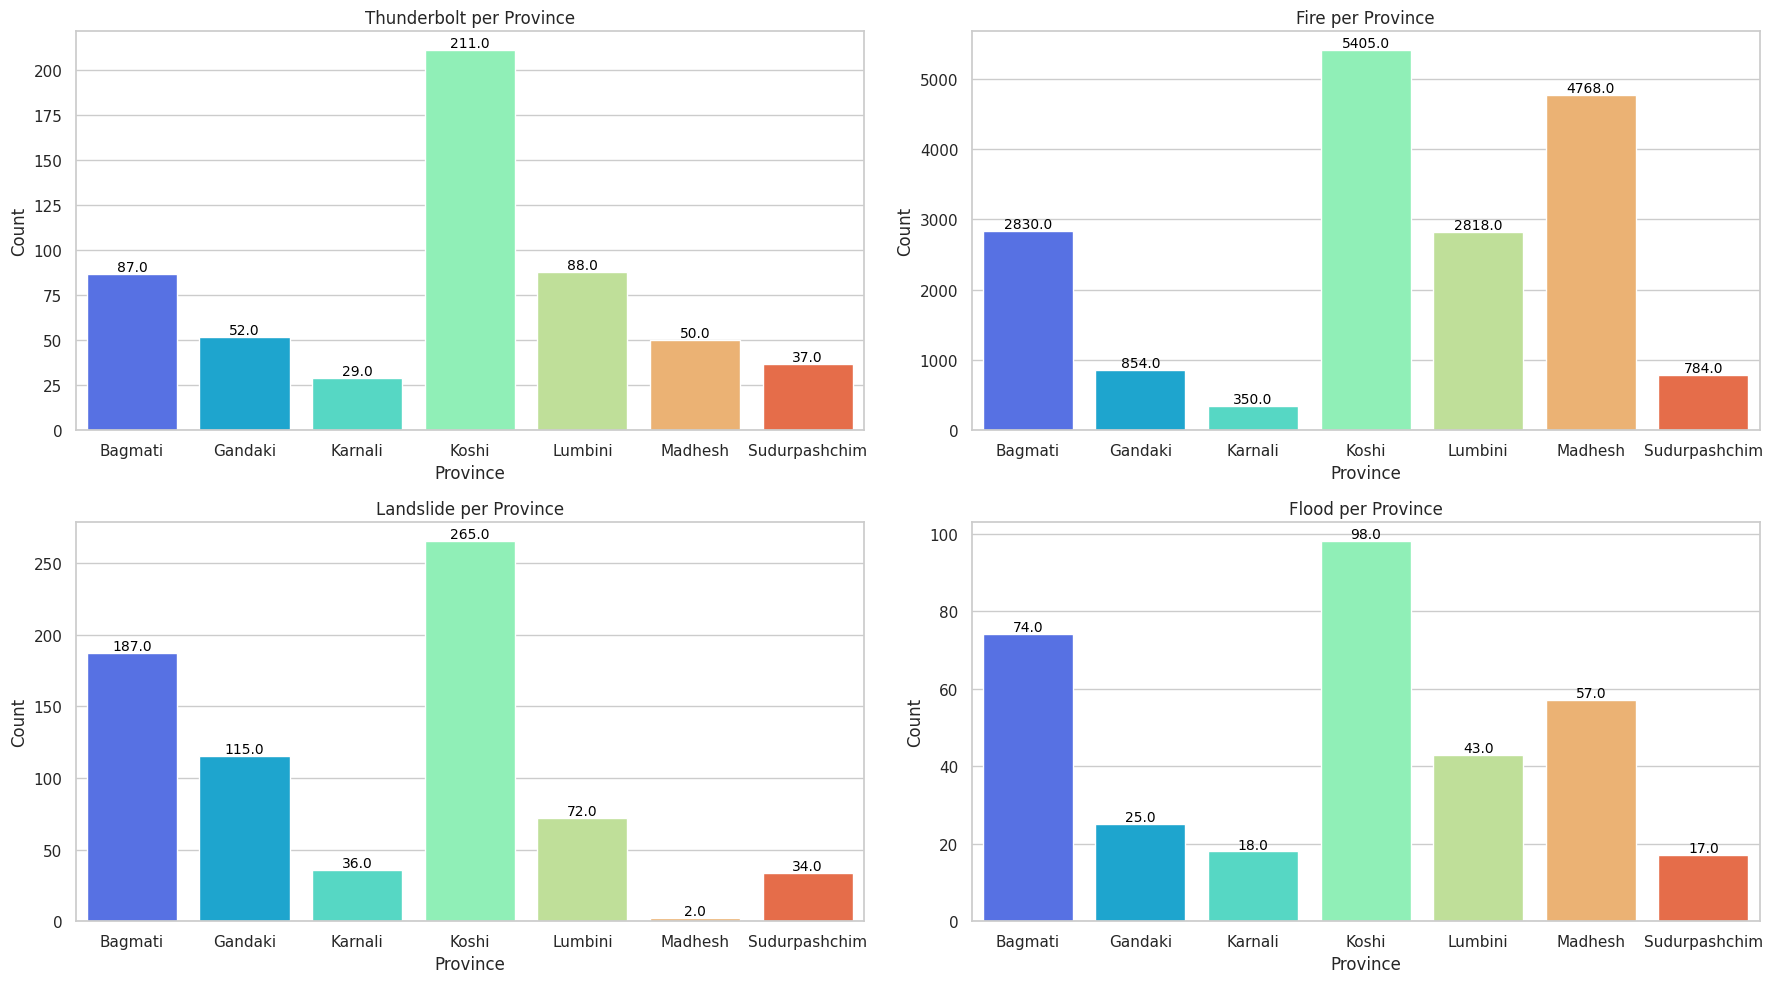

In [ ]:
selected_disasters = ['Thunderbolt','Fire', 'Landslide', 'Flood']
filtered_data = disaster_data[disaster_data['Disaster'].isin(selected_disasters)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

for i, disaster in enumerate(selected_disasters):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    current_disaster_data = filtered_data[filtered_data['Disaster'] == disaster]
    sns.countplot(data=current_disaster_data, x='province', ax=ax, palette='rainbow')

    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

        ax.set_title(f"{disaster} per Province")
    ax.set_xlabel("Province")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

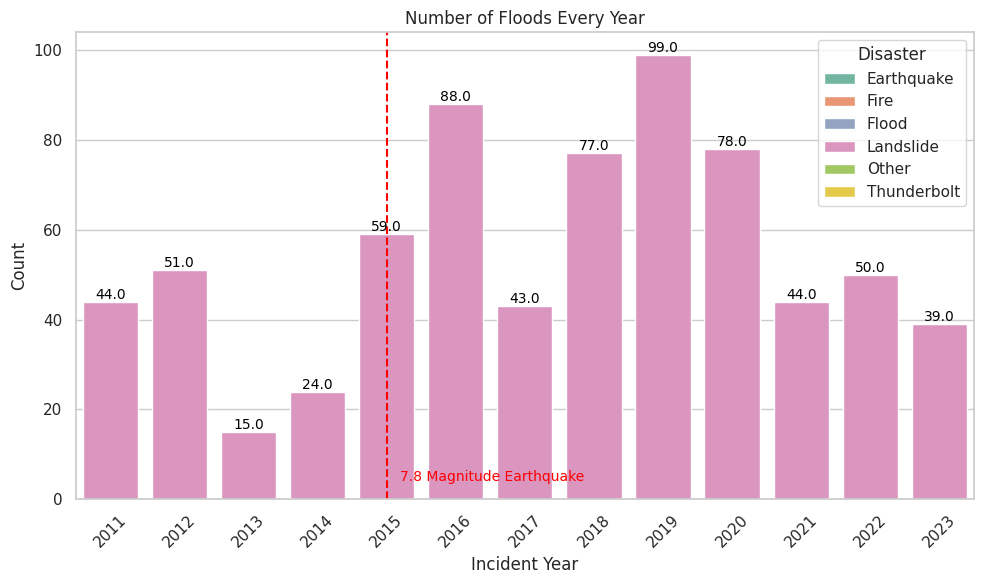

In [ ]:
selected_disasters = ['Landslide']
filtered_data = disaster_data[disaster_data['Disaster'].isin(selected_disasters)]

# Create a countplot with stretched bar width
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_data, x='incident_year', hue='Disaster', palette='Set2', dodge=False)
plt.title('Number of Floods Every Year')
plt.xlabel('Incident Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Disaster', loc='upper right')

# Add sum values at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Add a vertical line and label
incident_year_to_mark = 2015
ax.axvline(x=incident_year_to_mark - 2011, color='red', linestyle='--', label='Marked Year')
ax.annotate('7.8 Magnitude Earthquake', xy=(incident_year_to_mark - 2011, 0.95), xytext=(10, 10),
            textcoords='offset points', color='red', fontsize=10)

plt.tight_layout()

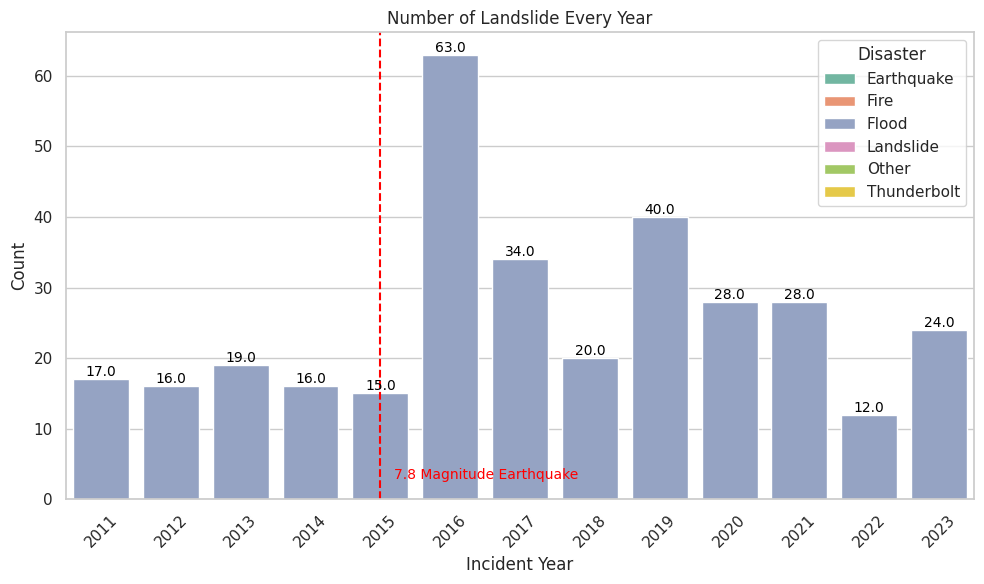

In [ ]:
selected_disasters = ['Flood']
filtered_data = disaster_data[disaster_data['Disaster'].isin(selected_disasters)]

# Create a countplot with stretched bar width
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=filtered_data, x='incident_year', hue='Disaster', palette='Set2', dodge=False)
plt.title('Number of Landslide Every Year')
plt.xlabel('Incident Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Disaster', loc='upper right')

# Add sum values at the top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Add a vertical line and label
incident_year_to_mark = 2015
ax.axvline(x=incident_year_to_mark - 2011, color='red', linestyle='--', label='Marked Year')
ax.annotate('7.8 Magnitude Earthquake', xy=(incident_year_to_mark - 2011, 0.95), xytext=(10, 10),
            textcoords='offset points', color='red', fontsize=10)

plt.tight_layout()
plt.show()

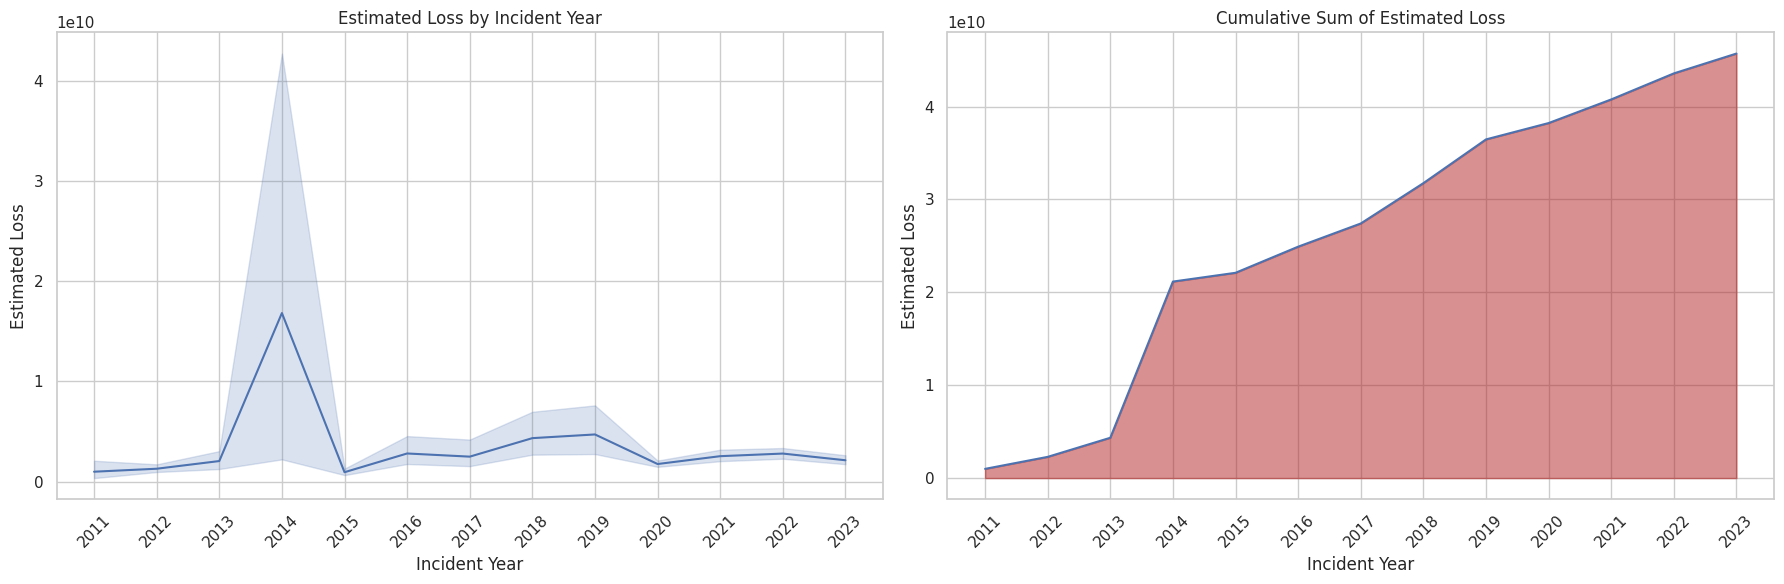

In [ ]:
cumulative_loss_per_year = disaster_data.groupby("incident_year")["Estimated Loss"].sum().cumsum()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# First subplot: Estimated Loss by Incident Year
sns.lineplot(x="incident_year", y="Estimated Loss", data=disaster_data, estimator='sum', ax=axes[0])
axes[0].set_title('Estimated Loss by Incident Year')
axes[0].set_xlabel("Incident Year")
axes[0].set_ylabel("Estimated Loss")
axes[0].set_xticks(disaster_data["incident_year"].unique())
axes[0].tick_params(axis='x', rotation=45)

# Second subplot: Cumulative Sum of Estimated Loss per Year
sns.lineplot(x=cumulative_loss_per_year.index, y=cumulative_loss_per_year.values, ax=axes[1])
axes[1].set_title('Cumulative Sum of Estimated Loss')
axes[1].set_xlabel("Incident Year")
axes[1].set_ylabel("Estimated Loss")
axes[1].set_xticks(cumulative_loss_per_year.index)
axes[1].tick_params(axis='x', rotation=45)

# Fill the area under the line
axes[1].fill_between(cumulative_loss_per_year.index, cumulative_loss_per_year.values, color='firebrick', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
disaster_data.groupby("Disaster")["Estimated Loss"].sum()

,Estimated Loss
Disaster,
Earthquake,6.480000e+06
Fire,2.553198e+10
Flood,1.709396e+10
Landslide,1.884919e+09
Other,1.093705e+09
Thunderbolt,9.612176e+07


In [ ]:
disaster_data.groupby("incident_year")["Estimated Loss"].sum()

,Estimated Loss
incident_year,
2011,9.942077e+08
2012,1.291896e+09
2013,2.056863e+09
2014,1.681504e+10
2015,9.445895e+08
2016,2.812379e+09
2017,2.496785e+09
2018,4.341892e+09
2019,4.709510e+09


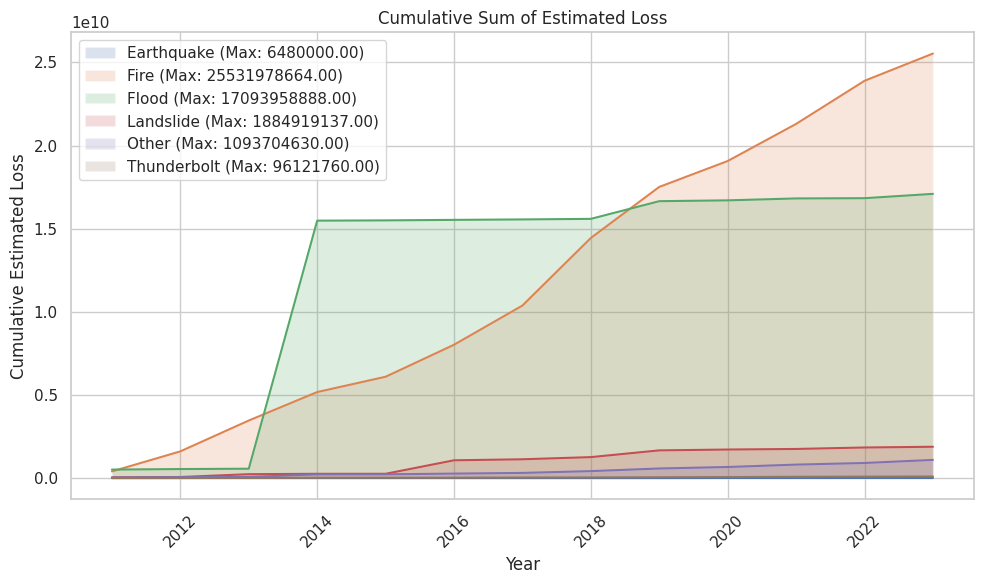

In [ ]:
cumulative_loss_per_year = disaster_data.groupby(["incident_year", "Disaster"])["Estimated Loss"].sum()
cumulative_loss_per_year = cumulative_loss_per_year.reset_index()

# Calculate cumulative sum by adding the loss of the previous year to the current year
cumulative_loss_per_year["Cumulative Loss"] = cumulative_loss_per_year.groupby("Disaster")["Estimated Loss"].cumsum()

# Create the cumulative graph
plt.figure(figsize=(10, 6))

# Stacked fill areas under each line
for disaster in cumulative_loss_per_year["Disaster"].unique():
    current_data = cumulative_loss_per_year[cumulative_loss_per_year["Disaster"] == disaster]
    plt.fill_between(current_data["incident_year"], 0, current_data["Cumulative Loss"],
                     alpha=0.2, label=disaster)
# Plot the lines
sns.lineplot(data=cumulative_loss_per_year, x="incident_year", y="Cumulative Loss", hue="Disaster")
plt.title('Cumulative Sum of Estimated Loss')
plt.xlabel("Year")
plt.ylabel("Cumulative Estimated Loss")
plt.legend(loc='lower right')

# Create a custom legend with max values
custom_legend = []
for disaster in cumulative_loss_per_year["Disaster"].unique():
    max_value = cumulative_loss_per_year[cumulative_loss_per_year["Disaster"] == disaster]["Cumulative Loss"].max()
    custom_legend.append(f'{disaster} (Max: {max_value:.2f})')

plt.legend(custom_legend, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

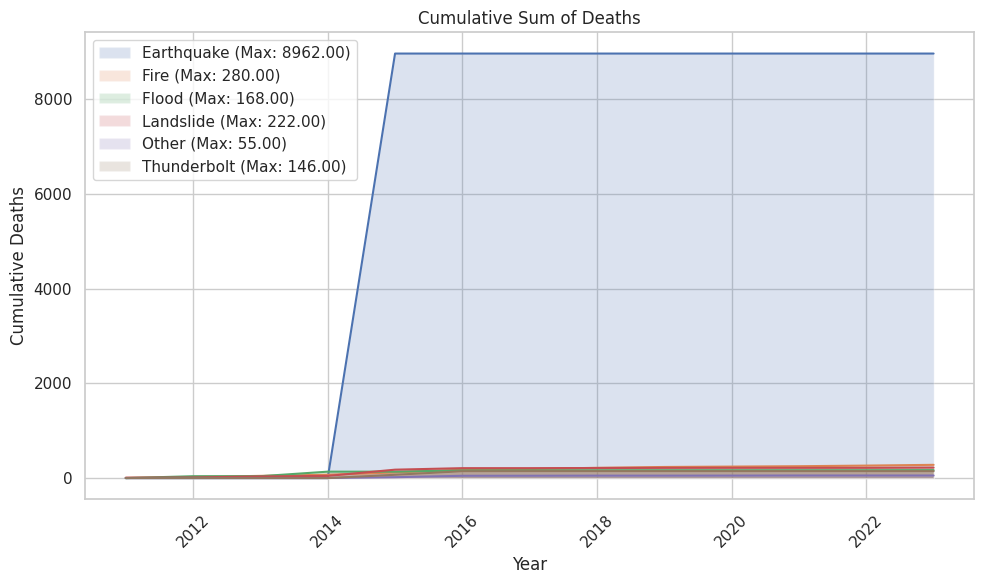

In [ ]:
cumulative_deaths_per_year = disaster_data.groupby(["incident_year", "Disaster"])["Total Death"].sum()
cumulative_deaths_per_year = cumulative_deaths_per_year.reset_index()

# Calculate cumulative sum by adding the loss of the previous year to the current year
cumulative_deaths_per_year["Cumulative Deaths"] = cumulative_deaths_per_year.groupby("Disaster")["Total Death"].cumsum()

# Create the cumulative graph
plt.figure(figsize=(10, 6))

# Stacked fill areas under each line
for disaster in cumulative_deaths_per_year["Disaster"].unique():
    current_data = cumulative_deaths_per_year[cumulative_deaths_per_year["Disaster"] == disaster]
    plt.fill_between(current_data["incident_year"], 0, current_data["Cumulative Deaths"],
                     alpha=0.2, label=disaster)
# Plot the lines
sns.lineplot(data=cumulative_deaths_per_year, x="incident_year", y="Cumulative Deaths", hue="Disaster")
plt.title('Cumulative Sum of Deaths')
plt.xlabel("Year")
plt.ylabel("Cumulative Deaths")
plt.legend(loc='lower right')

# Create a custom legend with max values
custom_legend = []
for disaster in cumulative_deaths_per_year["Disaster"].unique():
    max_value = cumulative_deaths_per_year[cumulative_deaths_per_year["Disaster"] == disaster]["Cumulative Deaths"].max()
    custom_legend.append(f'{disaster} (Max: {max_value:.2f})')

plt.legend(custom_legend, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

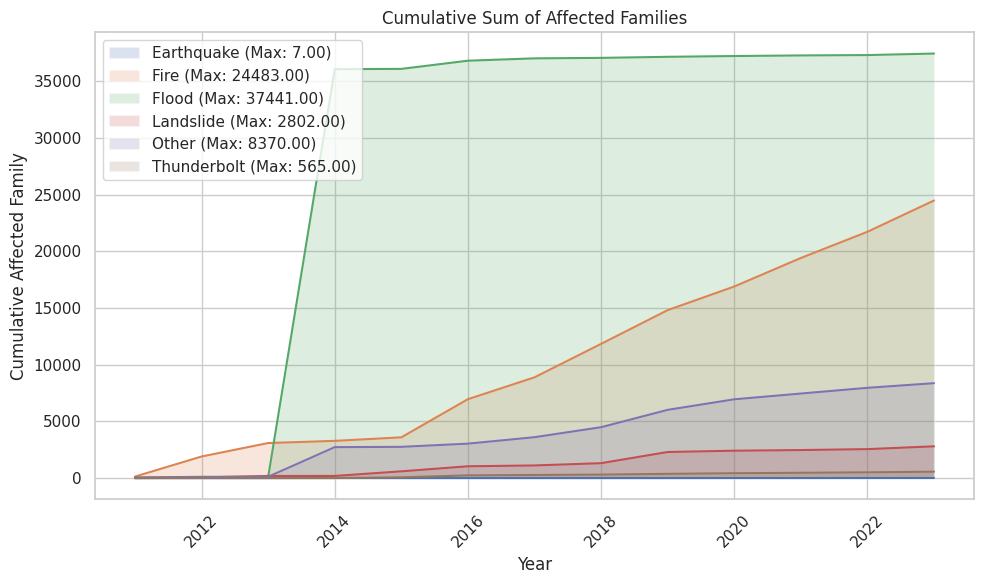

In [ ]:
cumulative_affected_family_per_year = disaster_data.groupby(["incident_year", "Disaster"])["Affected Family"].sum()
cumulative_affected_family_per_year = cumulative_affected_family_per_year.reset_index()

# Calculate cumulative sum by adding the loss of the previous year to the current year
cumulative_affected_family_per_year["Cumulative Affected"] = cumulative_affected_family_per_year.groupby("Disaster")["Affected Family"].cumsum()

# Create the cumulative graph
plt.figure(figsize=(10, 6))

# Stacked fill areas under each line
for disaster in cumulative_affected_family_per_year["Disaster"].unique():
    current_data = cumulative_affected_family_per_year[cumulative_affected_family_per_year["Disaster"] == disaster]
    plt.fill_between(current_data["incident_year"], 0, current_data["Cumulative Affected"],
                     alpha=0.2, label=disaster)
# Plot the lines
sns.lineplot(data=cumulative_affected_family_per_year, x="incident_year", y="Cumulative Affected", hue="Disaster")
plt.title('Cumulative Sum of Affected Families')
plt.xlabel("Year")
plt.ylabel("Cumulative Affected Family")
plt.legend(loc='lower right')

# Create a custom legend with max values
custom_legend = []
for disaster in cumulative_affected_family_per_year["Disaster"].unique():
    max_value = cumulative_affected_family_per_year[cumulative_affected_family_per_year["Disaster"] == disaster]["Cumulative Affected"].max()
    custom_legend.append(f'{disaster} (Max: {max_value:.2f})')

plt.legend(custom_legend, loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
auto=disaster_data[['Total Death', 'Estimated Loss', 'Affected Family', 'houses_fully_destroyed', 'houses_partially_destroyed','season']]
auto.head(5)

,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed,season
0,0,50000.0,2,0,1,Spring
1,0,7000000.0,0,0,0,Spring
2,0,100000.0,0,0,0,Spring
5,0,150000.0,1,1,0,Spring
6,0,150000.0,0,0,0,Spring


In [ ]:
season_type = pd.get_dummies(auto['season'], drop_first = True)
season_type

,Spring,Summer,Winter
0,True,False,False
1,True,False,False
2,True,False,False
5,True,False,False
6,True,False,False
...,...,...,...
36339,False,True,False
36341,False,True,False
36342,False,True,False
36345,False,True,False


In [ ]:
auto = pd.concat([auto, season_type], axis = 1)
auto

,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed,season,Spring,Summer,Winter
0,0,50000.0,2,0,1,Spring,True,False,False
1,0,7000000.0,0,0,0,Spring,True,False,False
2,0,100000.0,0,0,0,Spring,True,False,False
5,0,150000.0,1,1,0,Spring,True,False,False
6,0,150000.0,0,0,0,Spring,True,False,False
...,...,...,...,...,...,...,...,...,...
36339,0,400000.0,1,0,1,Summer,False,True,False
36341,0,500000.0,2,0,0,Summer,False,True,False
36342,0,24080687.0,1,0,0,Summer,False,True,False
36345,0,300000.0,1,0,0,Summer,False,True,False


In [ ]:
auto.drop(['season'], axis = 1, inplace = True)
auto.head(5)

,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed,Spring,Summer,Winter
0,0,50000.0,2,0,1,True,False,False
1,0,7000000.0,0,0,0,True,False,False
2,0,100000.0,0,0,0,True,False,False
5,0,150000.0,1,1,0,True,False,False
6,0,150000.0,0,0,0,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 1)
print(df_train)
print(df_test)

       Total Death  Estimated Loss  Affected Family  houses_fully_destroyed  \
21006            0        547000.0                1                       1   
20040            0         65000.0                1                       0   
26620            0       1400000.0                1                       0   
27918            0         50000.0                1                       0   
7383             1             0.0                1                       0   
...            ...             ...              ...                     ...   
16893            0        700000.0                1                       0   
28567            0        200000.0                1                       1   
7708             0             0.0                0                       0   
19441            0        200000.0                1                       0   
503              0         50000.0                0                       1   

       houses_partially_destroyed  Spring  Summer  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [ ]:
df_train.describe()

,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed
count,15178.000000,1.517800e+04,15178.000000,15178.000000,15178.000000
mean,0.390499,1.740389e+06,3.878640,29.677889,11.637568
std,29.891103,3.525038e+07,170.533405,1285.435808,326.561574
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,1.000000e+05,1.000000,0.000000,0.000000
50%,0.000000,2.500000e+05,1.000000,0.000000,0.000000
75%,0.000000,6.500000e+05,1.000000,1.000000,0.000000
max,3570.000000,3.775406e+09,17376.000000,90594.000000,17560.000000


In [ ]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['Total Death', 'Estimated Loss', 'Affected Family', 'houses_fully_destroyed', 'houses_partially_destroyed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.describe()

,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed
count,15178.000000,15178.000000,15178.000000,15178.000000,15178.000000
mean,0.000109,0.000461,0.000223,0.000328,0.000663
std,0.008373,0.009337,0.009814,0.014189,0.018597
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000026,0.000058,0.000000,0.000000
50%,0.000000,0.000066,0.000058,0.000000,0.000000
75%,0.000000,0.000172,0.000058,0.000011,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


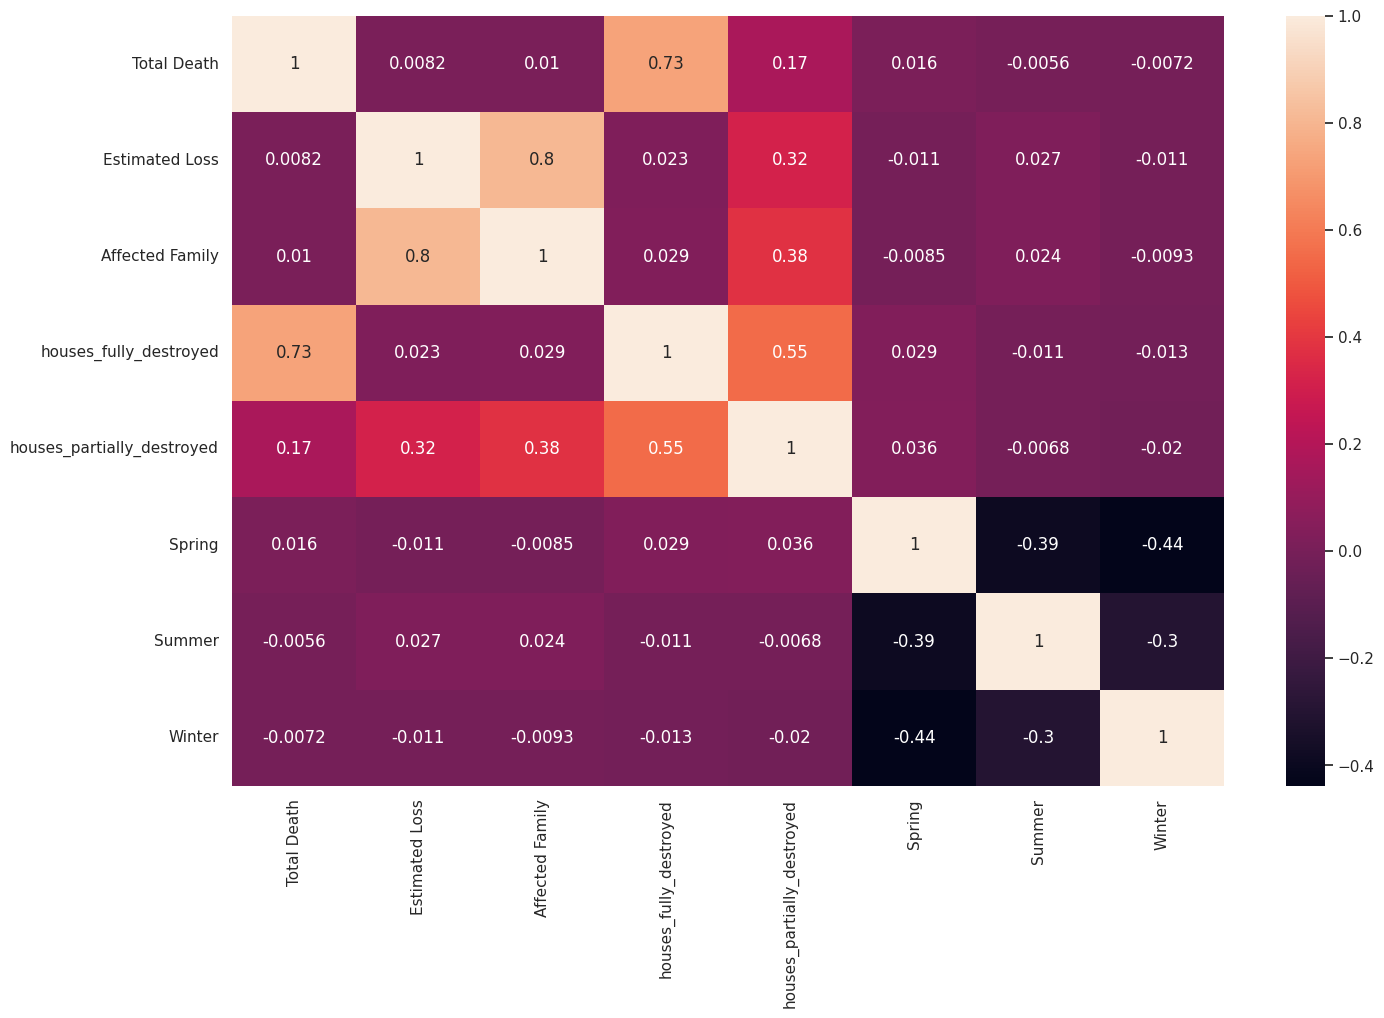

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True,)
plt.show()

In [ ]:
y_train = df_train.pop('Estimated Loss')
X_train = df_train

In [ ]:
y_train

,Estimated Loss
21006,0.000145
20040,0.000017
26620,0.000371
27918,0.000013
7383,0.000000
...,...
16893,0.000185
28567,0.000053
7708,0.000000
19441,0.000053


In [ ]:
X_train

,Total Death,Affected Family,houses_fully_destroyed,houses_partially_destroyed,Spring,Summer,Winter
21006,0.00000,0.000058,0.000011,0.000000,True,False,False
20040,0.00000,0.000058,0.000000,0.000057,False,False,True
26620,0.00000,0.000058,0.000000,0.000057,False,True,False
27918,0.00000,0.000058,0.000000,0.000000,False,False,True
7383,0.00028,0.000058,0.000000,0.000000,True,False,False
...,...,...,...,...,...,...,...
16893,0.00000,0.000058,0.000000,0.000057,True,False,False
28567,0.00000,0.000058,0.000011,0.000000,False,False,True
7708,0.00000,0.000000,0.000000,0.000000,True,False,False
19441,0.00000,0.000058,0.000000,0.000000,False,False,False


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
# lm.fit(X_train, y_train)

#rfe = RFE(lm, 10)
rfe = RFE(lm, n_features_to_select=10)
#running RFE
rfe = rfe.fit(X_train, y_train)

In [ ]:
X_train.columns

Index(['Total Death', 'Affected Family', 'houses_fully_destroyed',
       'houses_partially_destroyed', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Total Death', True, 1),
 ('Affected Family', True, 1),
 ('houses_fully_destroyed', True, 1),
 ('houses_partially_destroyed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Total Death', 'Affected Family', 'houses_fully_destroyed',
       'houses_partially_destroyed', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
X_train_rfe

,Total Death,Affected Family,houses_fully_destroyed,houses_partially_destroyed,Spring,Summer,Winter
21006,0.00000,0.000058,0.000011,0.000000,True,False,False
20040,0.00000,0.000058,0.000000,0.000057,False,False,True
26620,0.00000,0.000058,0.000000,0.000057,False,True,False
27918,0.00000,0.000058,0.000000,0.000000,False,False,True
7383,0.00028,0.000058,0.000000,0.000000,True,False,False
...,...,...,...,...,...,...,...
16893,0.00000,0.000058,0.000000,0.000057,True,False,False
28567,0.00000,0.000058,0.000011,0.000000,False,False,True
7708,0.00000,0.000000,0.000000,0.000000,True,False,False
19441,0.00000,0.000058,0.000000,0.000000,False,False,False


In [ ]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe['Spring'] = X_train_rfe['Spring'].astype(int)
X_train_rfe['Summer'] = X_train_rfe['Summer'].astype(int)
X_train_rfe['Winter'] = X_train_rfe['Winter'].astype(int)
X_train_rfe

,const,Total Death,Affected Family,houses_fully_destroyed,houses_partially_destroyed,Spring,Summer,Winter
21006,1.0,0.00000,0.000058,0.000011,0.000000,1,0,0
20040,1.0,0.00000,0.000058,0.000000,0.000057,0,0,1
26620,1.0,0.00000,0.000058,0.000000,0.000057,0,1,0
27918,1.0,0.00000,0.000058,0.000000,0.000000,0,0,1
7383,1.0,0.00028,0.000058,0.000000,0.000000,1,0,0
...,...,...,...,...,...,...,...,...
16893,1.0,0.00000,0.000058,0.000000,0.000057,1,0,0
28567,1.0,0.00000,0.000058,0.000011,0.000000,0,0,1
7708,1.0,0.00000,0.000000,0.000000,0.000000,1,0,0
19441,1.0,0.00000,0.000058,0.000000,0.000000,0,0,0


In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()  # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Estimated Loss   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     3969.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        06:12:26   Log-Likelihood:                 57301.
No. Observations:               15178   AIC:                        -1.146e+05
Df Residuals:                   15170   BIC:                        -1.145e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
X_train_new1 = X_train_rfe.drop(["Spring"], axis = 1)
X_train_new1

# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_new1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Estimated Loss   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     4631.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        06:12:38   Log-Likelihood:                 57301.
No. Observations:               15178   AIC:                        -1.146e+05
Df Residuals:                   15171   BIC:                        -1.145e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
X_train_new2 = X_train_new1.drop(["Winter"], axis = 1)

# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_new2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Estimated Loss   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     5558.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        06:12:50   Log-Likelihood:                 57301.
No. Observations:               15178   AIC:                        -1.146e+05
Df Residuals:                   15172   BIC:                        -1.145e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
X_train_new3 = X_train_new2.drop(["houses_partially_destroyed"], axis = 1)

# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_new3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Estimated Loss   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     6941.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        06:13:12   Log-Likelihood:                 57296.
No. Observations:               15178   AIC:                        -1.146e+05
Df Residuals:                   15173   BIC:                        -1.145e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
X_train_new4 = X_train_new3.drop(["houses_fully_destroyed"], axis = 1)

# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_new4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Estimated Loss   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     9255.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        06:13:20   Log-Likelihood:                 57296.
No. Observations:               15178   AIC:                        -1.146e+05
Df Residuals:                   15174   BIC:                        -1.146e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003   5.08e-05     

In [ ]:
X_train_new5 = X_train_new4.drop(["Total Death"], axis = 1)

# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_new5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Estimated Loss   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 1.388e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        06:13:32   Log-Likelihood:                 57296.
No. Observations:               15178   AIC:                        -1.146e+05
Df Residuals:                   15175   BIC:                        -1.146e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003   5.08e-05     

In [ ]:
df_test

,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed,Spring,Summer,Winter
32651,0,12000.0,1,0,0,False,False,True
12568,0,1004500.0,3,0,0,True,False,False
1702,0,2900000.0,1,1,0,True,False,False
8700,0,670000.0,1,1,0,False,True,False
31987,0,200000.0,1,1,0,False,False,True
...,...,...,...,...,...,...,...,...
13030,0,600000.0,3,3,0,True,False,False
36100,0,70000.0,2,0,0,False,True,False
25258,0,100000.0,1,0,0,True,False,False
9048,0,2150000.0,1,1,0,False,False,False


In [ ]:
num_vars = ['Total Death','Estimated Loss','Affected Family', 'houses_fully_destroyed','houses_partially_destroyed']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test

,Total Death,Estimated Loss,Affected Family,houses_fully_destroyed,houses_partially_destroyed,Spring,Summer,Winter
32651,0.0,0.000003,0.000058,0.000000,0.000000,False,False,True
12568,0.0,0.000266,0.000173,0.000000,0.000000,True,False,False
1702,0.0,0.000768,0.000058,0.000011,0.000000,True,False,False
8700,0.0,0.000177,0.000058,0.000011,0.000000,False,True,False
31987,0.0,0.000053,0.000058,0.000011,0.000000,False,False,True
...,...,...,...,...,...,...,...,...
13030,0.0,0.000159,0.000173,0.000033,0.000000,True,False,False
36100,0.0,0.000019,0.000115,0.000000,0.000000,False,True,False
25258,0.0,0.000026,0.000058,0.000000,0.000000,True,False,False
9048,0.0,0.000569,0.000058,0.000011,0.000000,False,False,False


In [ ]:
y_test = df_test.pop('Estimated Loss')
X_test = df_test
y_test

,Estimated Loss
32651,0.000003
12568,0.000266
1702,0.000768
8700,0.000177
31987,0.000053
...,...
13030,0.000159
36100,0.000019
25258,0.000026
9048,0.000569


In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['Affected Family','Summer']]

X_test_new

,Affected Family,Summer
32651,0.000058,False
12568,0.000173,False
1702,0.000058,False
8700,0.000058,True
31987,0.000058,False
...,...,...
13030,0.000173,False
36100,0.000115,True
25258,0.000058,False
9048,0.000058,False


In [ ]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,Affected Family,Summer
32651,1.0,0.000058,False
12568,1.0,0.000173,False
1702,1.0,0.000058,False
8700,1.0,0.000058,True
31987,1.0,0.000058,False
...,...,...,...
13030,1.0,0.000173,False
36100,1.0,0.000115,True
25258,1.0,0.000058,False
9048,1.0,0.000058,False


In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)
y_pred

,0
32651,0.000299
12568,0.000387
1702,0.000299
8700,0.000464
31987,0.000299
...,...
13030,0.000387
36100,0.000508
25258,0.000299
9048,0.000299


In [ ]:
y_test

,Estimated Loss
32651,0.000003
12568,0.000266
1702,0.000768
8700,0.000177
31987,0.000053
...,...
13030,0.000159
36100,0.000019
25258,0.000026
9048,0.000569


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12235553486197426

Text(0, 0.5, 'y_pred')

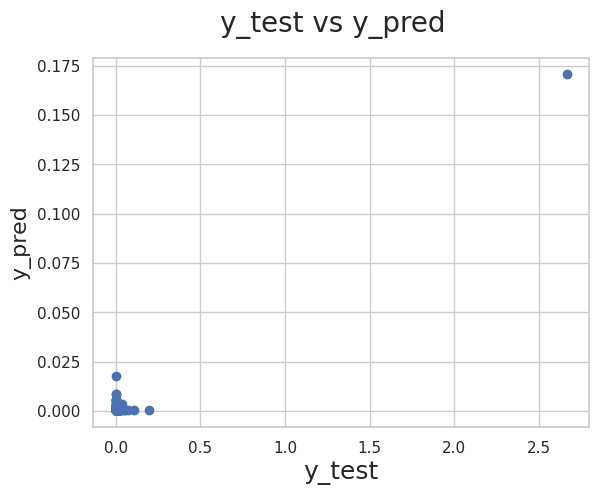

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label